### TransformerEncoder layers for transforming the ECG to the R-peaks encoding

In [3]:
import pickle
import numpy as np
import torch
from models.models import SimpleTransformerModel
from customLib.vis import plot_ecg
from customLib.dataset import read_dataset
from customLib.config import apnea_ecg_path, mitbih_path
from customLib.vis import plot_metrics
from customLib.print_model_parameters import print_model_parameters
from customLib.load_physionet_ecgs import load_physionet_ecgs

In [4]:
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(mitbih_path + "\\dataset\\downsampled", is_validation_set=True)

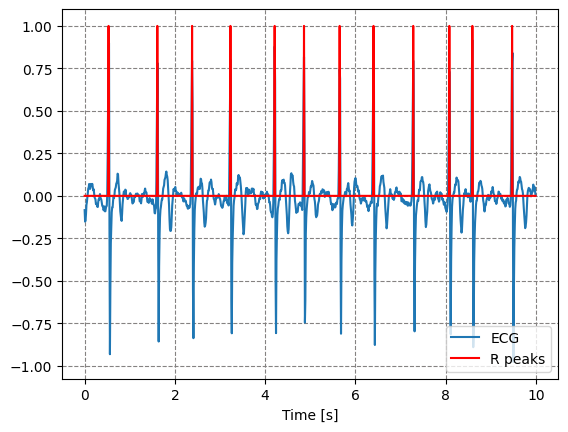

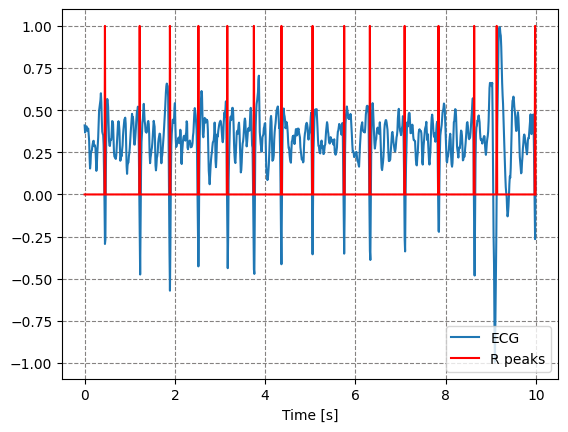

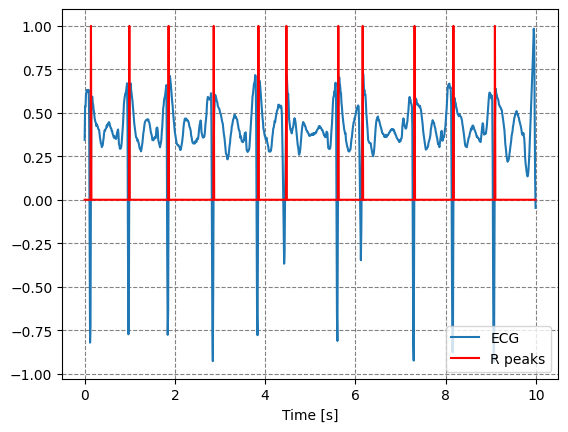

In [5]:
x_train = np.expand_dims(x_train, 2)
y_train = np.expand_dims(y_train, 2)

x_test = np.expand_dims(x_test, 2)
y_test = np.expand_dims(y_test, 2)

x_val = np.expand_dims(x_val, 2)
y_val = np.expand_dims(y_val, 2)

plot_ecg(x_train[100].flatten(), y_train[100].flatten(), 100)
plot_ecg(x_test[-1].flatten(), y_test[-1].flatten(), 100)
plot_ecg(x_val[-1].flatten(), y_val[-1].flatten(), 100)

In [7]:
epochs=50
batch_size = 100
input_dim = 32
seq_length = x_train.shape[1]
num_layers = 2
num_heads = 4
dim_feedforward = 32
dropout = 0.2

model = SimpleTransformerModel(input_dim, seq_length, num_layers, num_heads, dim_feedforward, dropout)
# model.load_state_dict(torch.load(".\\checkpoints\TNET\\TNET_epoch_48_acc_99.15_f1_0.93.pt"))

Training will be performed with: cuda:0


e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [8]:
print_model_parameters(model)

Layer embedding_layer: 4736 parameters
Layer embedding_layer.0: 64 parameters
Layer embedding_layer.2: 1568 parameters
Layer embedding_layer.4: 3104 parameters
Layer encoder_layer: 6464 parameters
Layer encoder_layer.self_attn: 4224 parameters
Layer encoder_layer.self_attn.out_proj: 1056 parameters
Layer encoder_layer.linear1: 1056 parameters
Layer encoder_layer.linear2: 1056 parameters
Layer encoder_layer.norm1: 64 parameters
Layer encoder_layer.norm2: 64 parameters
Layer transformer_encoder: 12928 parameters
Layer transformer_encoder.layers: 12928 parameters
Layer transformer_encoder.layers.0: 6464 parameters
Layer transformer_encoder.layers.0.self_attn: 4224 parameters
Layer transformer_encoder.layers.0.self_attn.out_proj: 1056 parameters
Layer transformer_encoder.layers.0.linear1: 1056 parameters
Layer transformer_encoder.layers.0.linear2: 1056 parameters
Layer transformer_encoder.layers.0.norm1: 64 parameters
Layer transformer_encoder.layers.0.norm2: 64 parameters
Layer transforme

====Epoch [1/50]====


  0%|          | 0/119 [00:00<?, ?it/s]e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
 99%|█████████▉| 118/119 [02:20<00:01,  1.28s/it]

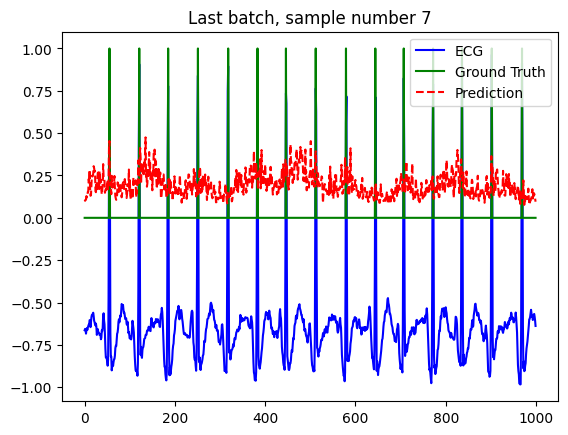

100%|██████████| 119/119 [02:22<00:00,  1.20s/it]



Train Loss: 0.6985
train Weighted Accuracy: 0.70320
train F1 Score: 0.18365
train TPR: 0.45088
train FPR: 0.04448
train TNR: 0.95552
train FNR: 0.54912



100%|██████████| 20/20 [00:04<00:00,  4.20it/s]



Validation Loss: 0.4226
validation Weighted Accuracy: 0.50000
validation F1 Score: 0.00000
validation TPR: 0.00000
validation FPR: 0.00000
validation TNR: 1.00000
validation FNR: 1.00000

====Epoch [2/50]====


 99%|█████████▉| 118/119 [02:23<00:01,  1.08s/it]

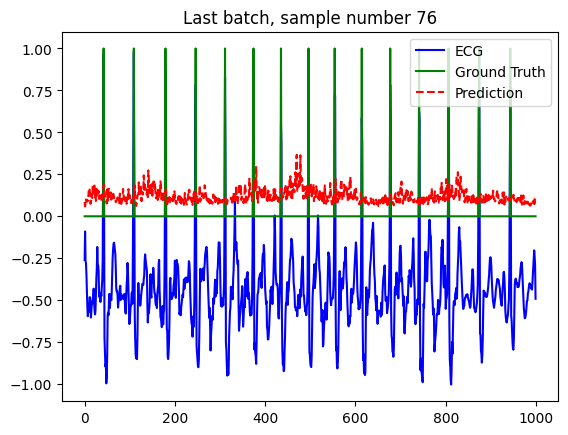

100%|██████████| 119/119 [02:24<00:00,  1.21s/it]



Train Loss: 0.4035
train Weighted Accuracy: 0.50112
train F1 Score: 0.00468
train TPR: 0.00237
train FPR: 0.00012
train TNR: 0.99988
train FNR: 0.99763



100%|██████████| 20/20 [00:04<00:00,  4.92it/s]



Validation Loss: 0.3882
validation Weighted Accuracy: 0.50000
validation F1 Score: 0.00000
validation TPR: 0.00000
validation FPR: 0.00000
validation TNR: 1.00000
validation FNR: 1.00000

====Epoch [3/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

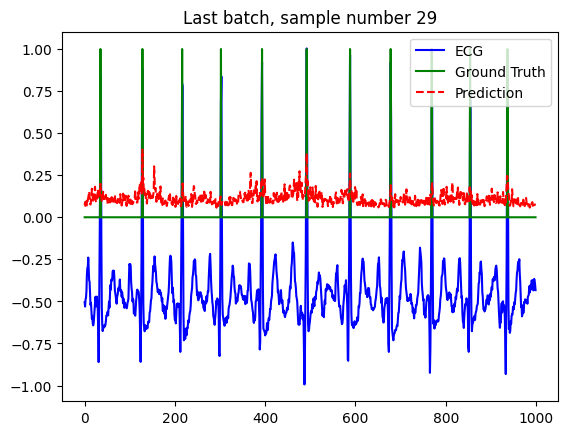

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.3826
train Weighted Accuracy: 0.50011
train F1 Score: 0.00044
train TPR: 0.00022
train FPR: 0.00000
train TNR: 1.00000
train FNR: 0.99978



100%|██████████| 20/20 [00:04<00:00,  4.84it/s]



Validation Loss: 0.3672
validation Weighted Accuracy: 0.50000
validation F1 Score: 0.00000
validation TPR: 0.00000
validation FPR: 0.00000
validation TNR: 1.00000
validation FNR: 1.00000

====Epoch [4/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

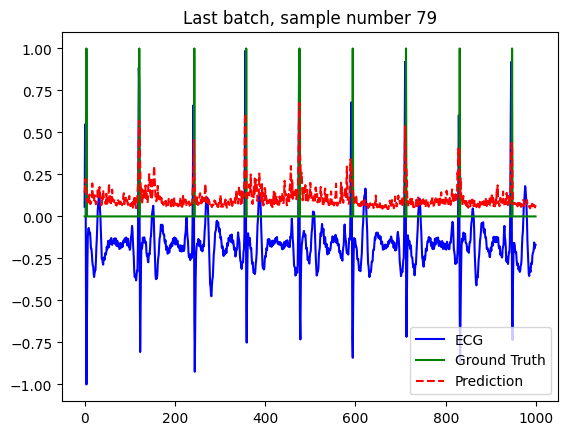

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.3448
train Weighted Accuracy: 0.52128
train F1 Score: 0.08154
train TPR: 0.04259
train FPR: 0.00003
train TNR: 0.99997
train FNR: 0.95741



100%|██████████| 20/20 [00:04<00:00,  4.92it/s]



Validation Loss: 0.3028
validation Weighted Accuracy: 0.57100
validation F1 Score: 0.24857
validation TPR: 0.14200
validation FPR: 0.00001
validation TNR: 0.99999
validation FNR: 0.85800

====Epoch [5/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

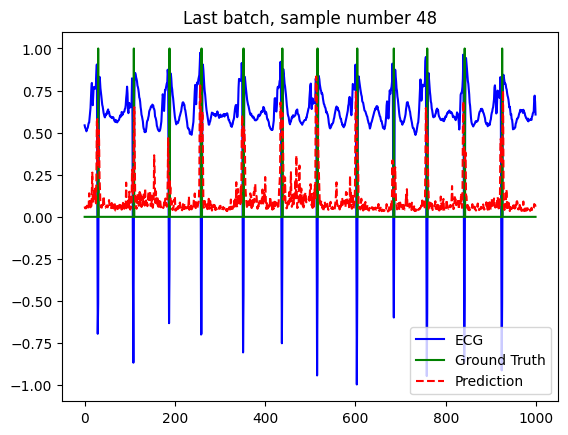

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.2706
train Weighted Accuracy: 0.74013
train F1 Score: 0.63531
train TPR: 0.48068
train FPR: 0.00042
train TNR: 0.99958
train FNR: 0.51932



100%|██████████| 20/20 [00:04<00:00,  4.92it/s]



Validation Loss: 0.2314
validation Weighted Accuracy: 0.82479
validation F1 Score: 0.77521
validation TPR: 0.64993
validation FPR: 0.00034
validation TNR: 0.99966
validation FNR: 0.35007

====Epoch [6/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

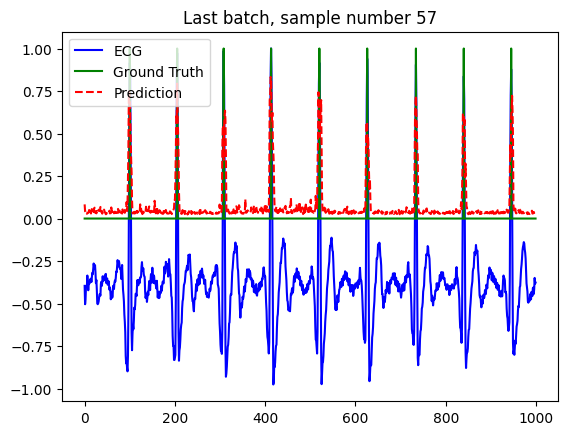

100%|██████████| 119/119 [02:09<00:00,  1.09s/it]



Train Loss: 0.2195
train Weighted Accuracy: 0.86816
train F1 Score: 0.81217
train TPR: 0.73732
train FPR: 0.00101
train TNR: 0.99899
train FNR: 0.26268



100%|██████████| 20/20 [00:04<00:00,  4.93it/s]



Validation Loss: 0.1967
validation Weighted Accuracy: 0.88968
validation F1 Score: 0.85236
validation TPR: 0.78001
validation FPR: 0.00064
validation TNR: 0.99936
validation FNR: 0.21999

====Epoch [7/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.08s/it]

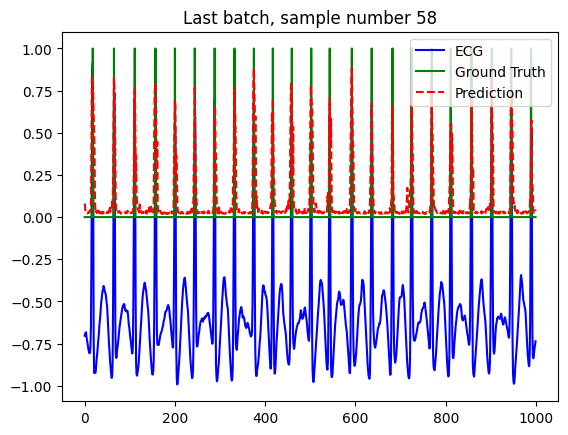

100%|██████████| 119/119 [02:11<00:00,  1.10s/it]



Train Loss: 0.1905
train Weighted Accuracy: 0.91237
train F1 Score: 0.84854
train TPR: 0.82631
train FPR: 0.00156
train TNR: 0.99844
train FNR: 0.17369



100%|██████████| 20/20 [00:03<00:00,  5.02it/s]



Validation Loss: 0.1732
validation Weighted Accuracy: 0.92870
validation F1 Score: 0.88687
validation TPR: 0.85840
validation FPR: 0.00099
validation TNR: 0.99901
validation FNR: 0.14160

====Epoch [8/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

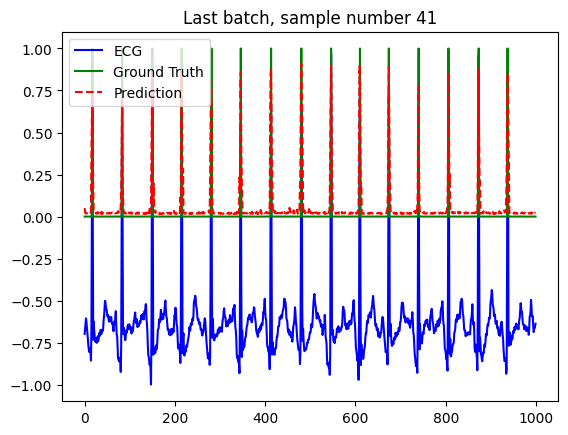

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.1708
train Weighted Accuracy: 0.93705
train F1 Score: 0.86139
train TPR: 0.87613
train FPR: 0.00203
train TNR: 0.99797
train FNR: 0.12387



100%|██████████| 20/20 [00:03<00:00,  5.03it/s]



Validation Loss: 0.1580
validation Weighted Accuracy: 0.94466
validation F1 Score: 0.89497
validation TPR: 0.89060
validation FPR: 0.00128
validation TNR: 0.99872
validation FNR: 0.10940

====Epoch [9/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

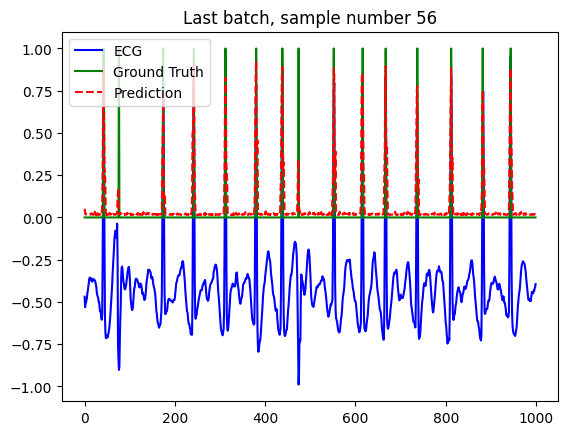

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.1570
train Weighted Accuracy: 0.94841
train F1 Score: 0.86845
train TPR: 0.89903
train FPR: 0.00220
train TNR: 0.99780
train FNR: 0.10097



100%|██████████| 20/20 [00:04<00:00,  4.49it/s]



Validation Loss: 0.1467
validation Weighted Accuracy: 0.95219
validation F1 Score: 0.89340
validation TPR: 0.90595
validation FPR: 0.00157
validation TNR: 0.99843
validation FNR: 0.09405

====Epoch [10/50]====


 99%|█████████▉| 118/119 [02:13<00:01,  1.08s/it]

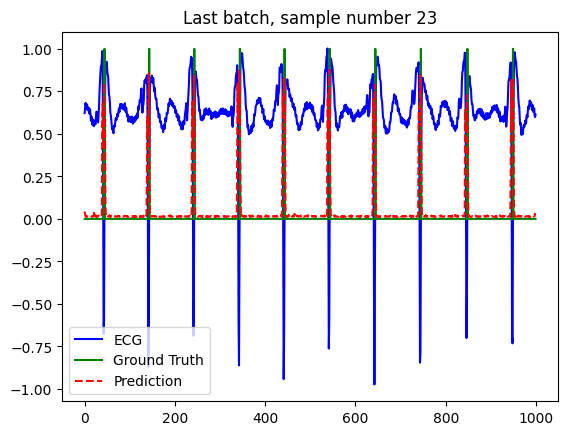

100%|██████████| 119/119 [02:14<00:00,  1.13s/it]



Train Loss: 0.1467
train Weighted Accuracy: 0.95485
train F1 Score: 0.87174
train TPR: 0.91202
train FPR: 0.00232
train TNR: 0.99768
train FNR: 0.08798



100%|██████████| 20/20 [00:03<00:00,  5.05it/s]



Validation Loss: 0.1385
validation Weighted Accuracy: 0.95723
validation F1 Score: 0.89059
validation TPR: 0.91627
validation FPR: 0.00181
validation TNR: 0.99819
validation FNR: 0.08373

====Epoch [11/50]====


 99%|█████████▉| 118/119 [02:08<00:01,  1.08s/it]

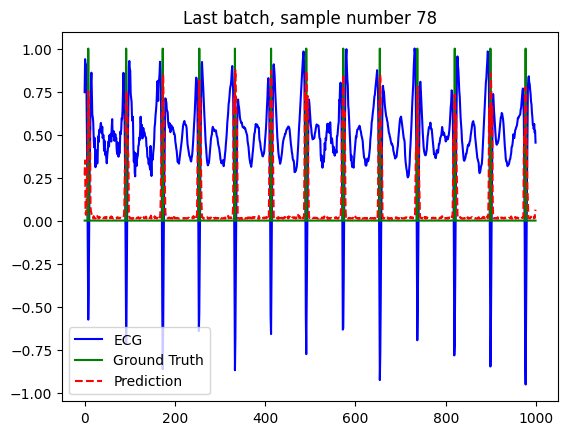

100%|██████████| 119/119 [02:09<00:00,  1.09s/it]



Train Loss: 0.1392
train Weighted Accuracy: 0.95896
train F1 Score: 0.87424
train TPR: 0.92030
train FPR: 0.00238
train TNR: 0.99762
train FNR: 0.07970



100%|██████████| 20/20 [00:04<00:00,  4.98it/s]



Validation Loss: 0.1321
validation Weighted Accuracy: 0.96131
validation F1 Score: 0.88940
validation TPR: 0.92460
validation FPR: 0.00198
validation TNR: 0.99802
validation FNR: 0.07540

====Epoch [12/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

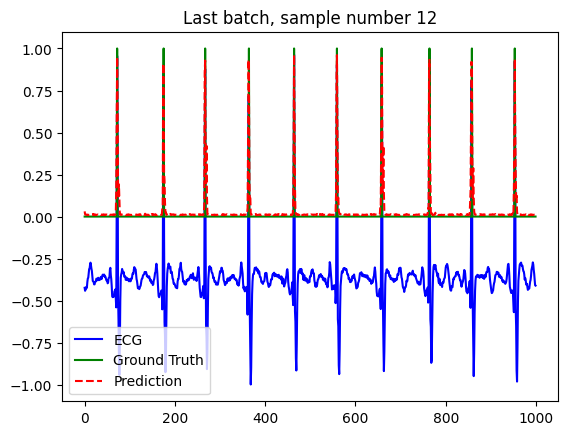

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.1332
train Weighted Accuracy: 0.96248
train F1 Score: 0.87866
train TPR: 0.92732
train FPR: 0.00236
train TNR: 0.99764
train FNR: 0.07268



100%|██████████| 20/20 [00:04<00:00,  4.90it/s]



Validation Loss: 0.1269
validation Weighted Accuracy: 0.96457
validation F1 Score: 0.89546
validation TPR: 0.93105
validation FPR: 0.00191
validation TNR: 0.99809
validation FNR: 0.06895

====Epoch [13/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

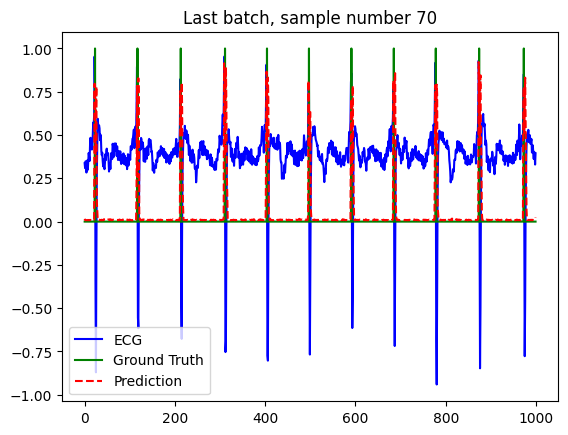

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.1280
train Weighted Accuracy: 0.96500
train F1 Score: 0.88659
train TPR: 0.93219
train FPR: 0.00219
train TNR: 0.99781
train FNR: 0.06781



100%|██████████| 20/20 [00:04<00:00,  4.90it/s]



Validation Loss: 0.1225
validation Weighted Accuracy: 0.96727
validation F1 Score: 0.90408
validation TPR: 0.93627
validation FPR: 0.00173
validation TNR: 0.99827
validation FNR: 0.06373

====Epoch [14/50]====


 99%|█████████▉| 118/119 [01:43<00:00,  1.56it/s]

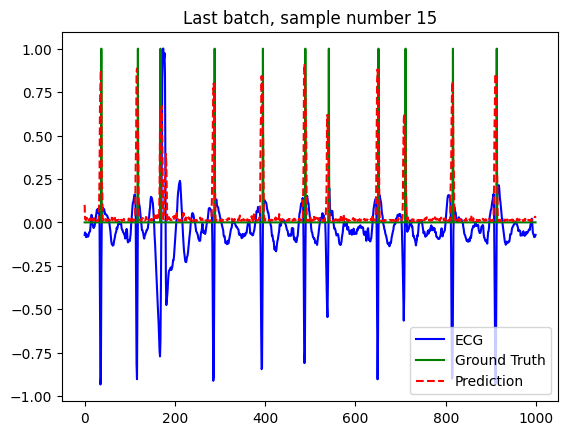

100%|██████████| 119/119 [01:44<00:00,  1.14it/s]



Train Loss: 0.1236
train Weighted Accuracy: 0.96717
train F1 Score: 0.89500
train TPR: 0.93634
train FPR: 0.00201
train TNR: 0.99799
train FNR: 0.06366



100%|██████████| 20/20 [00:02<00:00,  8.93it/s]



Validation Loss: 0.1189
validation Weighted Accuracy: 0.96950
validation F1 Score: 0.91004
validation TPR: 0.94062
validation FPR: 0.00162
validation TNR: 0.99838
validation FNR: 0.05938

====Epoch [15/50]====


 99%|█████████▉| 118/119 [01:17<00:00,  1.11it/s]

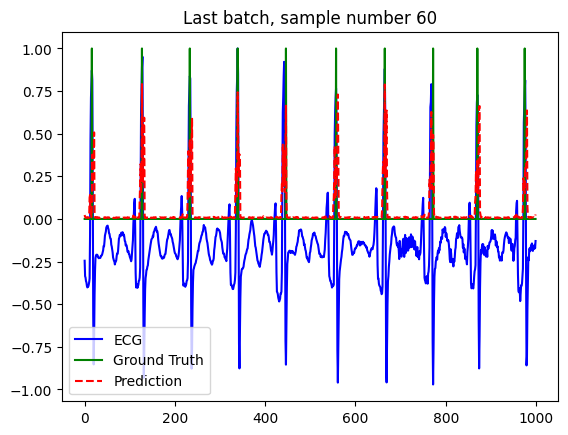

100%|██████████| 119/119 [01:18<00:00,  1.52it/s]



Train Loss: 0.1200
train Weighted Accuracy: 0.96940
train F1 Score: 0.90122
train TPR: 0.94070
train FPR: 0.00189
train TNR: 0.99811
train FNR: 0.05930



100%|██████████| 20/20 [00:03<00:00,  5.02it/s]



Validation Loss: 0.1160
validation Weighted Accuracy: 0.97144
validation F1 Score: 0.91287
validation TPR: 0.94448
validation FPR: 0.00160
validation TNR: 0.99840
validation FNR: 0.05552

====Epoch [16/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

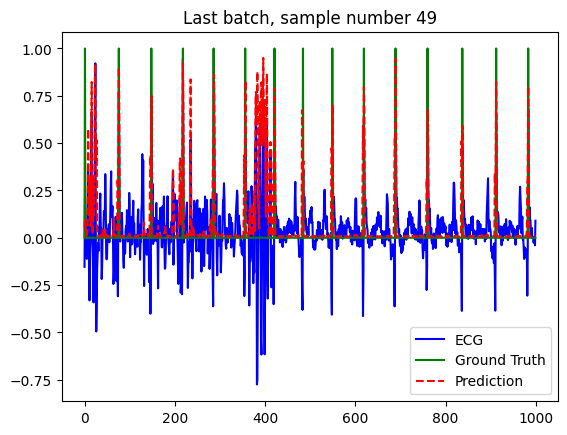

100%|██████████| 119/119 [02:09<00:00,  1.09s/it]



Train Loss: 0.1170
train Weighted Accuracy: 0.97097
train F1 Score: 0.90429
train TPR: 0.94380
train FPR: 0.00185
train TNR: 0.99815
train FNR: 0.05620



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]



Validation Loss: 0.1135
validation Weighted Accuracy: 0.97344
validation F1 Score: 0.91433
validation TPR: 0.94851
validation FPR: 0.00162
validation TNR: 0.99838
validation FNR: 0.05149

====Epoch [17/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.08s/it]

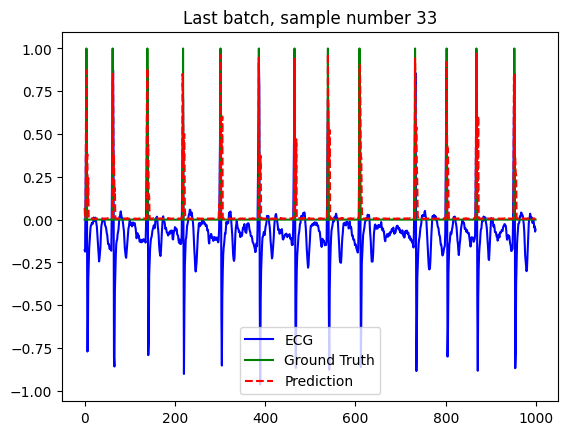

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.1142
train Weighted Accuracy: 0.97269
train F1 Score: 0.90733
train TPR: 0.94720
train FPR: 0.00181
train TNR: 0.99819
train FNR: 0.05280



100%|██████████| 20/20 [00:04<00:00,  4.87it/s]



Validation Loss: 0.1111
validation Weighted Accuracy: 0.97437
validation F1 Score: 0.91459
validation TPR: 0.95038
validation FPR: 0.00164
validation TNR: 0.99836
validation FNR: 0.04962

====Epoch [18/50]====


 99%|█████████▉| 118/119 [02:08<00:01,  1.08s/it]

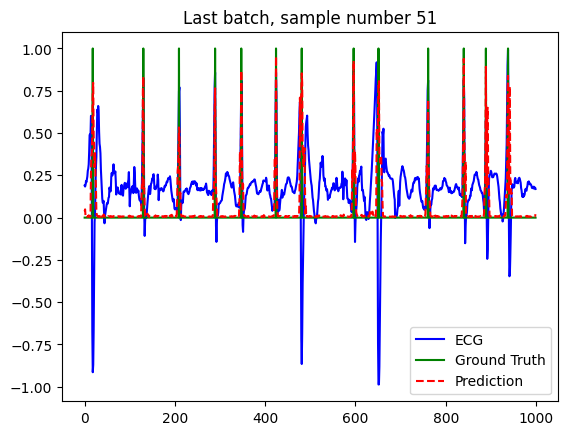

100%|██████████| 119/119 [02:09<00:00,  1.09s/it]



Train Loss: 0.1120
train Weighted Accuracy: 0.97395
train F1 Score: 0.90925
train TPR: 0.94970
train FPR: 0.00179
train TNR: 0.99821
train FNR: 0.05030



100%|██████████| 20/20 [00:02<00:00,  7.40it/s]



Validation Loss: 0.1091
validation Weighted Accuracy: 0.97543
validation F1 Score: 0.91491
validation TPR: 0.95253
validation FPR: 0.00167
validation TNR: 0.99833
validation FNR: 0.04747

====Epoch [19/50]====


 99%|█████████▉| 118/119 [01:58<00:01,  1.08s/it]

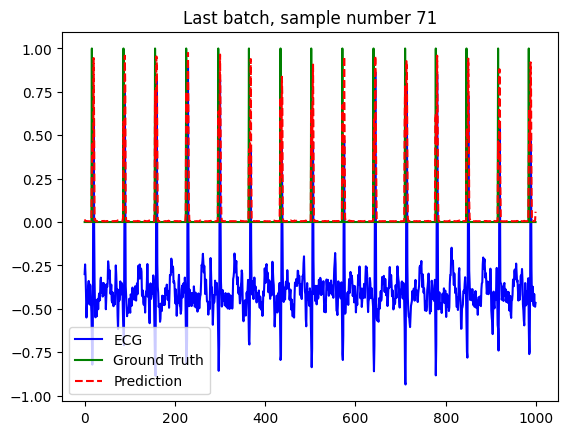

100%|██████████| 119/119 [02:00<00:00,  1.01s/it]



Train Loss: 0.1097
train Weighted Accuracy: 0.97534
train F1 Score: 0.91070
train TPR: 0.95247
train FPR: 0.00179
train TNR: 0.99821
train FNR: 0.04753



100%|██████████| 20/20 [00:04<00:00,  4.91it/s]



Validation Loss: 0.1071
validation Weighted Accuracy: 0.97626
validation F1 Score: 0.91468
validation TPR: 0.95421
validation FPR: 0.00170
validation TNR: 0.99830
validation FNR: 0.04579

====Epoch [20/50]====


 99%|█████████▉| 118/119 [02:08<00:01,  1.08s/it]

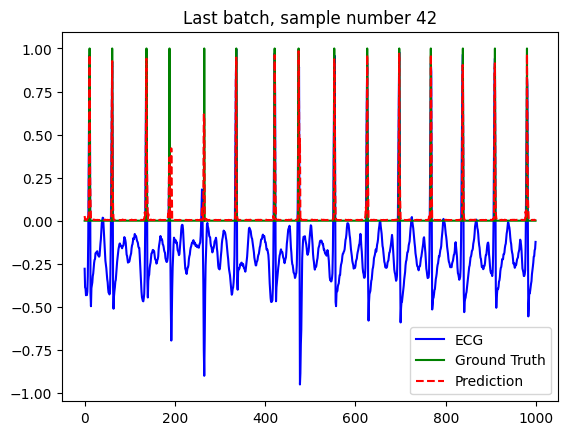

100%|██████████| 119/119 [02:09<00:00,  1.09s/it]



Train Loss: 0.1077
train Weighted Accuracy: 0.97646
train F1 Score: 0.91295
train TPR: 0.95468
train FPR: 0.00176
train TNR: 0.99824
train FNR: 0.04532



100%|██████████| 20/20 [00:02<00:00,  8.48it/s]



Validation Loss: 0.1053
validation Weighted Accuracy: 0.97730
validation F1 Score: 0.91499
validation TPR: 0.95632
validation FPR: 0.00172
validation TNR: 0.99828
validation FNR: 0.04368

====Epoch [21/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

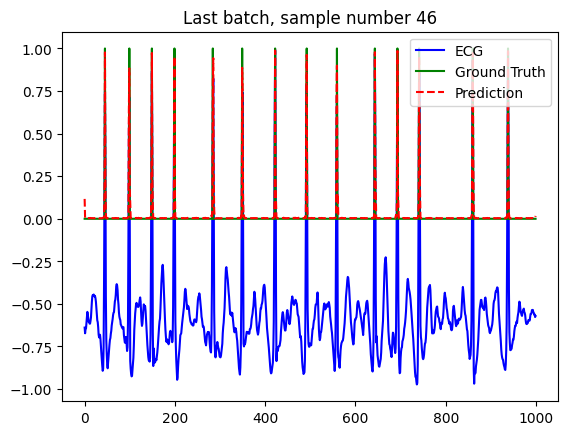

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.1060
train Weighted Accuracy: 0.97756
train F1 Score: 0.91485
train TPR: 0.95686
train FPR: 0.00174
train TNR: 0.99826
train FNR: 0.04314



100%|██████████| 20/20 [00:04<00:00,  4.99it/s]



Validation Loss: 0.1037
validation Weighted Accuracy: 0.97859
validation F1 Score: 0.91579
validation TPR: 0.95891
validation FPR: 0.00174
validation TNR: 0.99826
validation FNR: 0.04109

====Epoch [22/50]====


 99%|█████████▉| 118/119 [02:08<00:01,  1.08s/it]

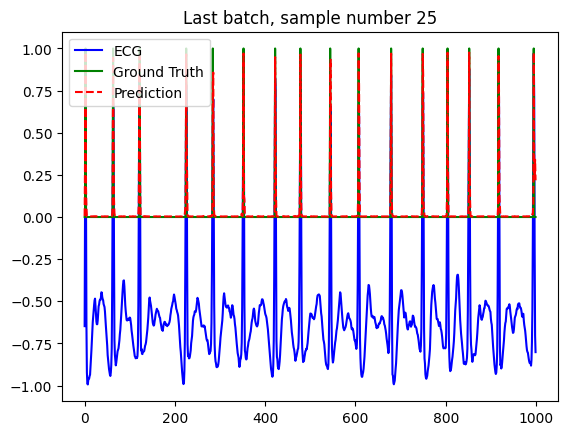

100%|██████████| 119/119 [02:10<00:00,  1.09s/it]



Train Loss: 0.1044
train Weighted Accuracy: 0.97889
train F1 Score: 0.91627
train TPR: 0.95951
train FPR: 0.00173
train TNR: 0.99827
train FNR: 0.04049



100%|██████████| 20/20 [00:04<00:00,  4.79it/s]



Validation Loss: 0.1023
validation Weighted Accuracy: 0.98009
validation F1 Score: 0.91676
validation TPR: 0.96194
validation FPR: 0.00175
validation TNR: 0.99825
validation FNR: 0.03806

====Epoch [23/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.09s/it]

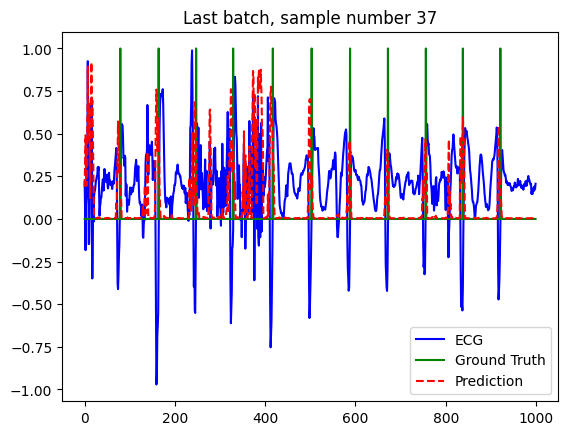

100%|██████████| 119/119 [02:13<00:00,  1.12s/it]



Train Loss: 0.1029
train Weighted Accuracy: 0.97986
train F1 Score: 0.91869
train TPR: 0.96141
train FPR: 0.00169
train TNR: 0.99831
train FNR: 0.03859



100%|██████████| 20/20 [00:02<00:00,  8.86it/s]



Validation Loss: 0.1011
validation Weighted Accuracy: 0.98122
validation F1 Score: 0.91837
validation TPR: 0.96417
validation FPR: 0.00174
validation TNR: 0.99826
validation FNR: 0.03583

====Epoch [24/50]====


 99%|█████████▉| 118/119 [01:29<00:01,  1.10s/it]

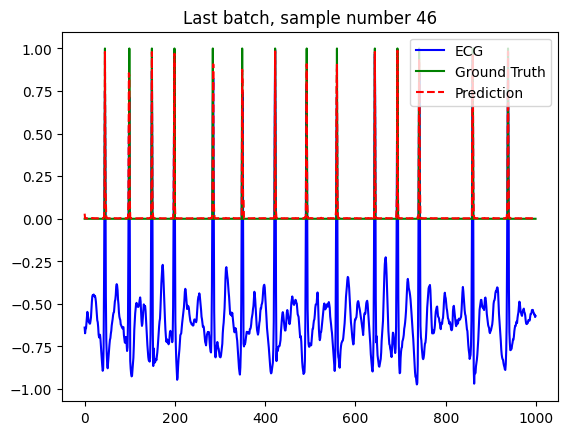

100%|██████████| 119/119 [01:31<00:00,  1.30it/s]



Train Loss: 0.1018
train Weighted Accuracy: 0.98070
train F1 Score: 0.91974
train TPR: 0.96310
train FPR: 0.00169
train TNR: 0.99831
train FNR: 0.03690



100%|██████████| 20/20 [00:04<00:00,  4.93it/s]



Validation Loss: 0.1001
validation Weighted Accuracy: 0.98187
validation F1 Score: 0.92018
validation TPR: 0.96545
validation FPR: 0.00171
validation TNR: 0.99829
validation FNR: 0.03455

====Epoch [25/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.07s/it]

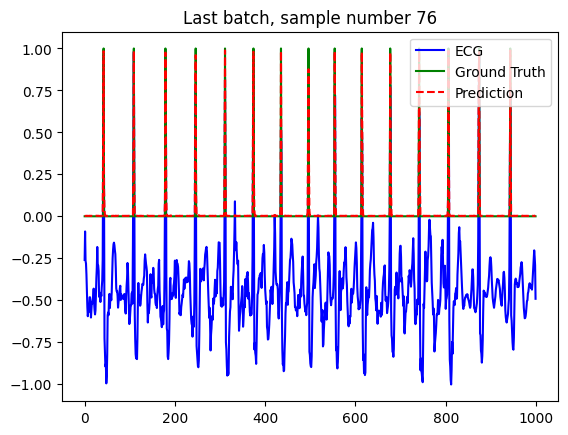

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.1007
train Weighted Accuracy: 0.98159
train F1 Score: 0.92084
train TPR: 0.96487
train FPR: 0.00168
train TNR: 0.99832
train FNR: 0.03513



100%|██████████| 20/20 [00:04<00:00,  4.90it/s]



Validation Loss: 0.0992
validation Weighted Accuracy: 0.98262
validation F1 Score: 0.92209
validation TPR: 0.96692
validation FPR: 0.00167
validation TNR: 0.99833
validation FNR: 0.03308

====Epoch [26/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.07s/it]

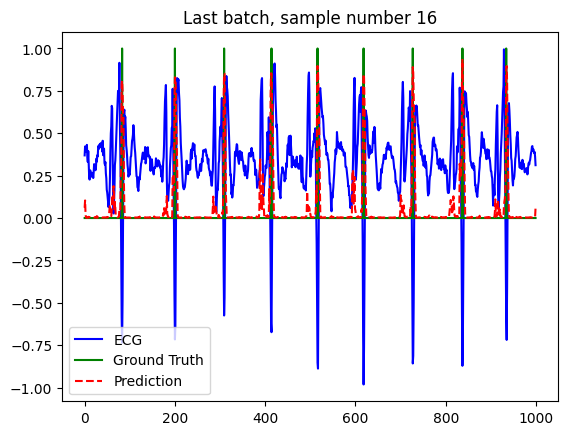

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0999
train Weighted Accuracy: 0.98226
train F1 Score: 0.92252
train TPR: 0.96618
train FPR: 0.00165
train TNR: 0.99835
train FNR: 0.03382



100%|██████████| 20/20 [00:03<00:00,  5.04it/s]



Validation Loss: 0.0984
validation Weighted Accuracy: 0.98306
validation F1 Score: 0.92352
validation TPR: 0.96776
validation FPR: 0.00164
validation TNR: 0.99836
validation FNR: 0.03224

====Epoch [27/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.07s/it]

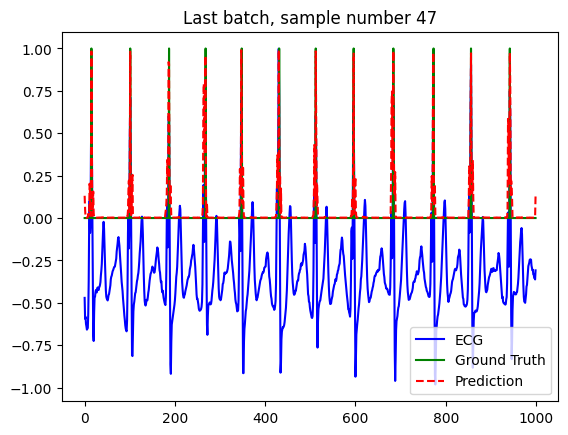

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0990
train Weighted Accuracy: 0.98291
train F1 Score: 0.92408
train TPR: 0.96744
train FPR: 0.00163
train TNR: 0.99837
train FNR: 0.03256



100%|██████████| 20/20 [00:04<00:00,  4.82it/s]



Validation Loss: 0.0977
validation Weighted Accuracy: 0.98375
validation F1 Score: 0.92404
validation TPR: 0.96915
validation FPR: 0.00165
validation TNR: 0.99835
validation FNR: 0.03085

====Epoch [28/50]====


 99%|█████████▉| 118/119 [02:08<00:01,  1.07s/it]

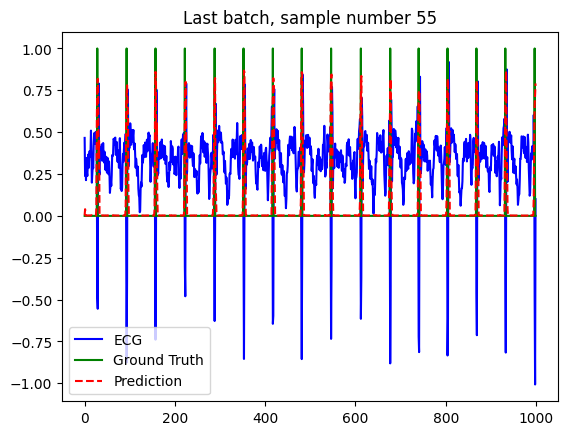

100%|██████████| 119/119 [02:10<00:00,  1.09s/it]



Train Loss: 0.0983
train Weighted Accuracy: 0.98343
train F1 Score: 0.92486
train TPR: 0.96847
train FPR: 0.00162
train TNR: 0.99838
train FNR: 0.03153



100%|██████████| 20/20 [00:03<00:00,  5.02it/s]



Validation Loss: 0.0971
validation Weighted Accuracy: 0.98422
validation F1 Score: 0.92521
validation TPR: 0.97007
validation FPR: 0.00163
validation TNR: 0.99837
validation FNR: 0.02993

====Epoch [29/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

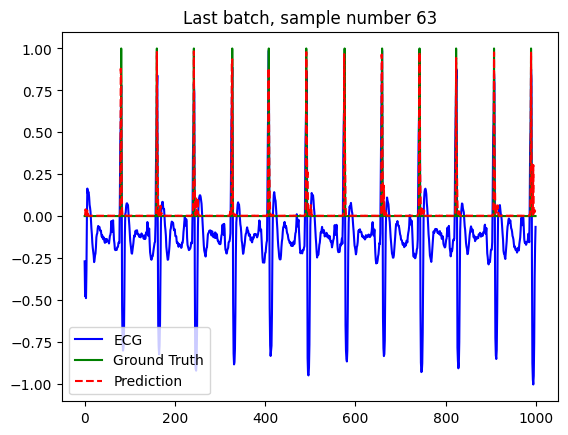

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0976
train Weighted Accuracy: 0.98393
train F1 Score: 0.92552
train TPR: 0.96947
train FPR: 0.00161
train TNR: 0.99839
train FNR: 0.03053



100%|██████████| 20/20 [00:04<00:00,  4.89it/s]



Validation Loss: 0.0965
validation Weighted Accuracy: 0.98456
validation F1 Score: 0.92674
validation TPR: 0.97071
validation FPR: 0.00159
validation TNR: 0.99841
validation FNR: 0.02929

====Epoch [30/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

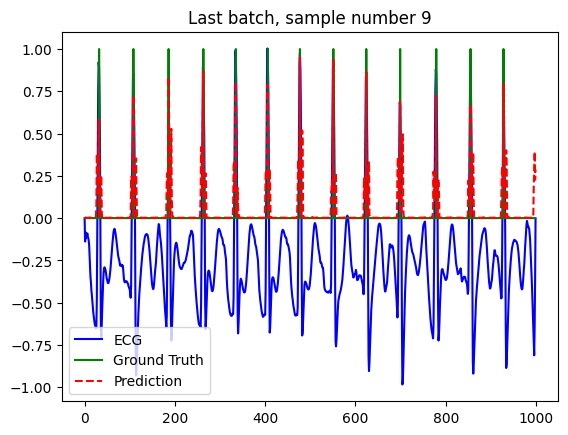

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0969
train Weighted Accuracy: 0.98426
train F1 Score: 0.92627
train TPR: 0.97013
train FPR: 0.00160
train TNR: 0.99840
train FNR: 0.02987



100%|██████████| 20/20 [00:03<00:00,  5.02it/s]



Validation Loss: 0.0958
validation Weighted Accuracy: 0.98480
validation F1 Score: 0.92739
validation TPR: 0.97119
validation FPR: 0.00158
validation TNR: 0.99842
validation FNR: 0.02881

====Epoch [31/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

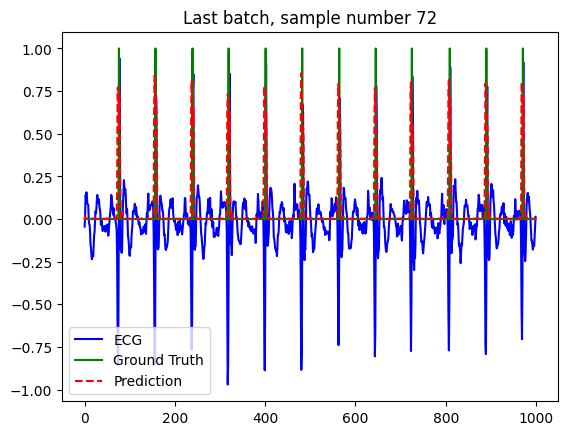

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0963
train Weighted Accuracy: 0.98465
train F1 Score: 0.92727
train TPR: 0.97089
train FPR: 0.00158
train TNR: 0.99842
train FNR: 0.02911



100%|██████████| 20/20 [00:04<00:00,  4.90it/s]



Validation Loss: 0.0953
validation Weighted Accuracy: 0.98508
validation F1 Score: 0.92891
validation TPR: 0.97170
validation FPR: 0.00155
validation TNR: 0.99845
validation FNR: 0.02830

====Epoch [32/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

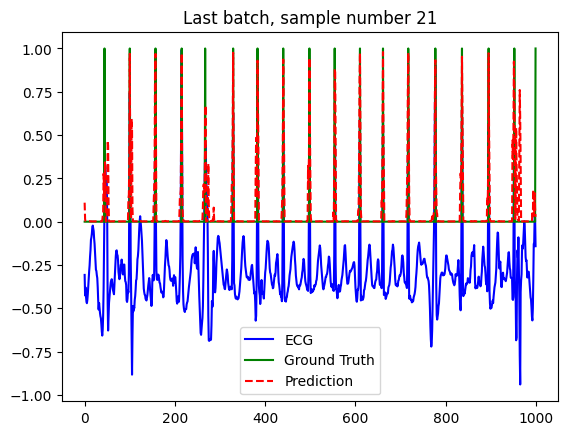

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0957
train Weighted Accuracy: 0.98508
train F1 Score: 0.92813
train TPR: 0.97172
train FPR: 0.00157
train TNR: 0.99843
train FNR: 0.02828



100%|██████████| 20/20 [00:03<00:00,  5.04it/s]



Validation Loss: 0.0947
validation Weighted Accuracy: 0.98562
validation F1 Score: 0.92934
validation TPR: 0.97278
validation FPR: 0.00155
validation TNR: 0.99845
validation FNR: 0.02722

====Epoch [33/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

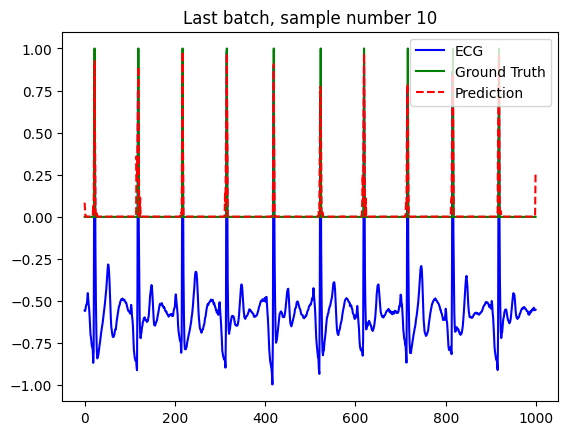

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0950
train Weighted Accuracy: 0.98533
train F1 Score: 0.92837
train TPR: 0.97223
train FPR: 0.00157
train TNR: 0.99843
train FNR: 0.02777



100%|██████████| 20/20 [00:04<00:00,  4.89it/s]



Validation Loss: 0.0942
validation Weighted Accuracy: 0.98554
validation F1 Score: 0.93097
validation TPR: 0.97258
validation FPR: 0.00150
validation TNR: 0.99850
validation FNR: 0.02742

====Epoch [34/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

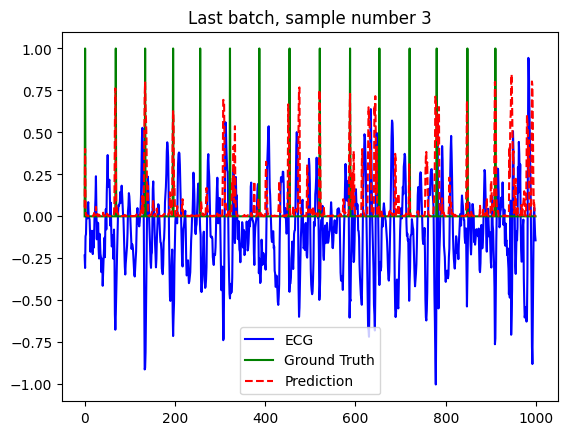

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0945
train Weighted Accuracy: 0.98565
train F1 Score: 0.92892
train TPR: 0.97286
train FPR: 0.00157
train TNR: 0.99843
train FNR: 0.02714



100%|██████████| 20/20 [00:04<00:00,  4.90it/s]



Validation Loss: 0.0936
validation Weighted Accuracy: 0.98569
validation F1 Score: 0.93206
validation TPR: 0.97286
validation FPR: 0.00147
validation TNR: 0.99853
validation FNR: 0.02714

====Epoch [35/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

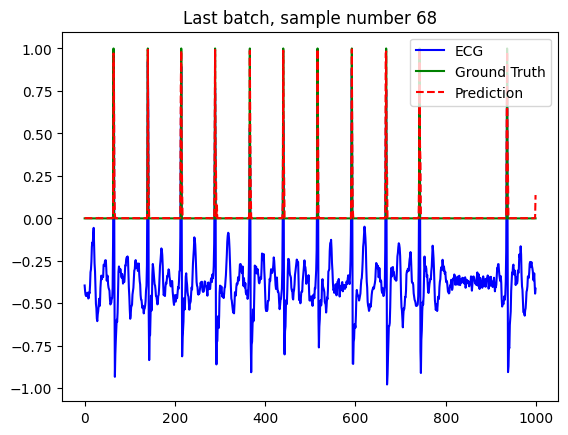

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0940
train Weighted Accuracy: 0.98575
train F1 Score: 0.92942
train TPR: 0.97305
train FPR: 0.00155
train TNR: 0.99845
train FNR: 0.02695



100%|██████████| 20/20 [00:03<00:00,  5.01it/s]



Validation Loss: 0.0931
validation Weighted Accuracy: 0.98619
validation F1 Score: 0.93240
validation TPR: 0.97386
validation FPR: 0.00148
validation TNR: 0.99852
validation FNR: 0.02614

====Epoch [36/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

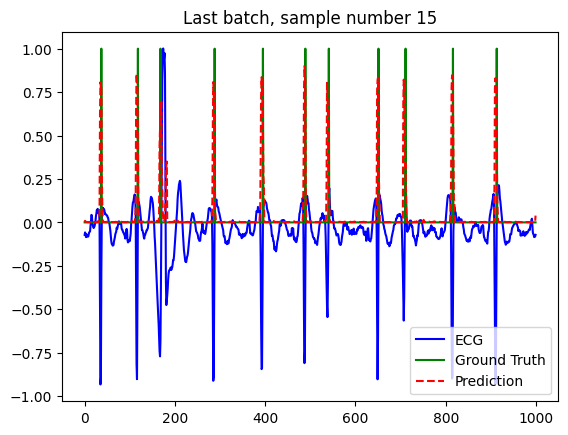

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0934
train Weighted Accuracy: 0.98600
train F1 Score: 0.92978
train TPR: 0.97356
train FPR: 0.00155
train TNR: 0.99845
train FNR: 0.02644



100%|██████████| 20/20 [00:04<00:00,  4.98it/s]



Validation Loss: 0.0926
validation Weighted Accuracy: 0.98624
validation F1 Score: 0.93291
validation TPR: 0.97394
validation FPR: 0.00146
validation TNR: 0.99854
validation FNR: 0.02606

====Epoch [37/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

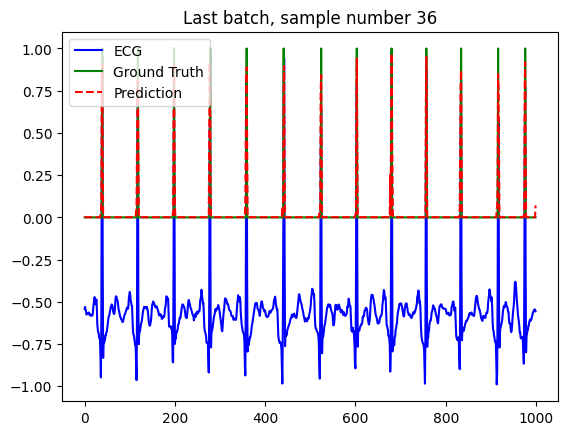

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0929
train Weighted Accuracy: 0.98617
train F1 Score: 0.93037
train TPR: 0.97387
train FPR: 0.00154
train TNR: 0.99846
train FNR: 0.02613



100%|██████████| 20/20 [00:04<00:00,  4.94it/s]



Validation Loss: 0.0921
validation Weighted Accuracy: 0.98612
validation F1 Score: 0.93451
validation TPR: 0.97366
validation FPR: 0.00141
validation TNR: 0.99859
validation FNR: 0.02634

====Epoch [38/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.07s/it]

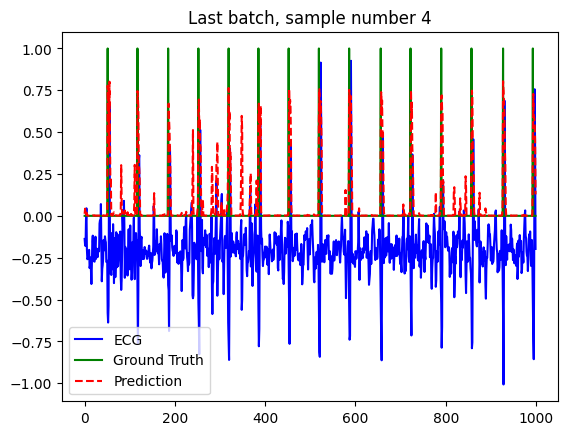

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0924
train Weighted Accuracy: 0.98648
train F1 Score: 0.93051
train TPR: 0.97451
train FPR: 0.00154
train TNR: 0.99846
train FNR: 0.02549



100%|██████████| 20/20 [00:03<00:00,  5.03it/s]



Validation Loss: 0.0916
validation Weighted Accuracy: 0.98649
validation F1 Score: 0.93574
validation TPR: 0.97437
validation FPR: 0.00139
validation TNR: 0.99861
validation FNR: 0.02563

====Epoch [39/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

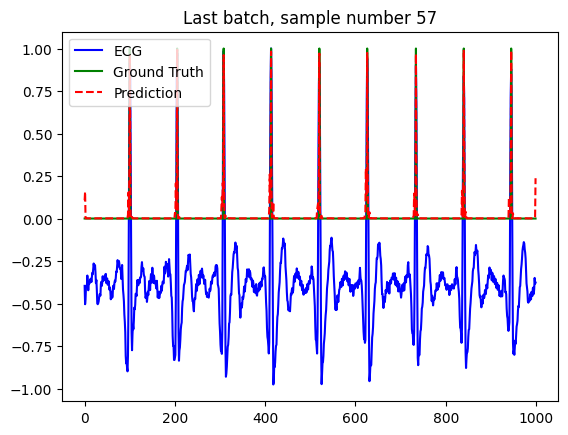

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0920
train Weighted Accuracy: 0.98642
train F1 Score: 0.93025
train TPR: 0.97438
train FPR: 0.00155
train TNR: 0.99845
train FNR: 0.02562



100%|██████████| 20/20 [00:03<00:00,  5.04it/s]



Validation Loss: 0.0911
validation Weighted Accuracy: 0.98689
validation F1 Score: 0.93577
validation TPR: 0.97517
validation FPR: 0.00140
validation TNR: 0.99860
validation FNR: 0.02483

====Epoch [40/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

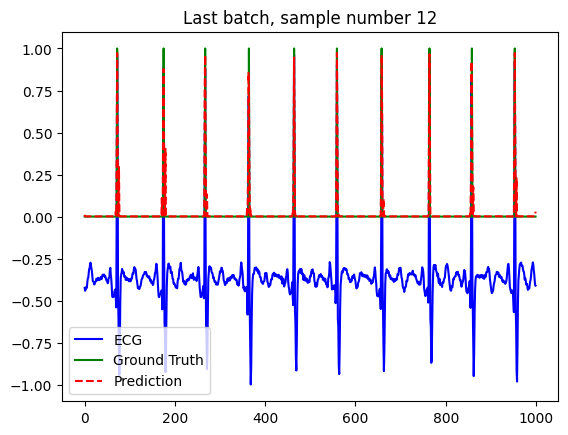

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0914
train Weighted Accuracy: 0.98672
train F1 Score: 0.93060
train TPR: 0.97499
train FPR: 0.00155
train TNR: 0.99845
train FNR: 0.02501



100%|██████████| 20/20 [00:04<00:00,  4.91it/s]



Validation Loss: 0.0906
validation Weighted Accuracy: 0.98694
validation F1 Score: 0.93671
validation TPR: 0.97525
validation FPR: 0.00137
validation TNR: 0.99863
validation FNR: 0.02475

====Epoch [41/50]====


 99%|█████████▉| 118/119 [02:26<00:01,  1.26s/it]

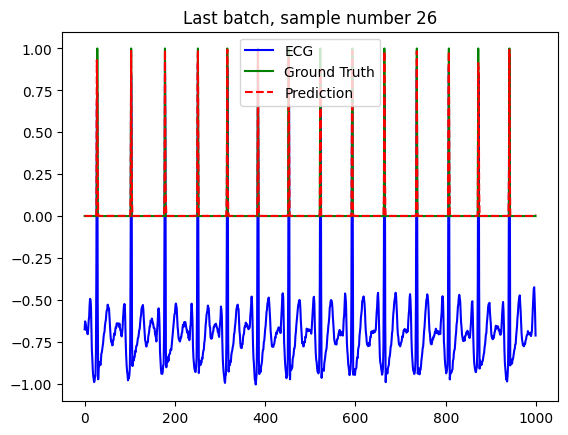

100%|██████████| 119/119 [02:28<00:00,  1.24s/it]



Train Loss: 0.0909
train Weighted Accuracy: 0.98695
train F1 Score: 0.93080
train TPR: 0.97544
train FPR: 0.00155
train TNR: 0.99845
train FNR: 0.02456



100%|██████████| 20/20 [00:04<00:00,  4.73it/s]



Validation Loss: 0.0901
validation Weighted Accuracy: 0.98719
validation F1 Score: 0.93667
validation TPR: 0.97577
validation FPR: 0.00138
validation TNR: 0.99862
validation FNR: 0.02423

====Epoch [42/50]====


 99%|█████████▉| 118/119 [01:51<00:01,  1.11s/it]

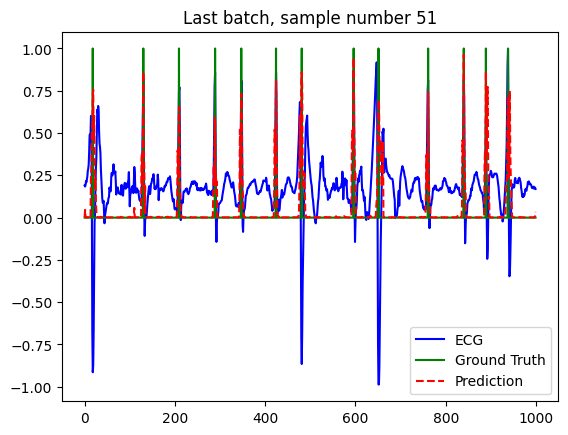

100%|██████████| 119/119 [01:52<00:00,  1.05it/s]



Train Loss: 0.0903
train Weighted Accuracy: 0.98712
train F1 Score: 0.93023
train TPR: 0.97581
train FPR: 0.00157
train TNR: 0.99843
train FNR: 0.02419



100%|██████████| 20/20 [00:04<00:00,  4.57it/s]



Validation Loss: 0.0896
validation Weighted Accuracy: 0.98708
validation F1 Score: 0.93714
validation TPR: 0.97553
validation FPR: 0.00137
validation TNR: 0.99863
validation FNR: 0.02447

====Epoch [43/50]====


 99%|█████████▉| 118/119 [02:08<00:01,  1.08s/it]

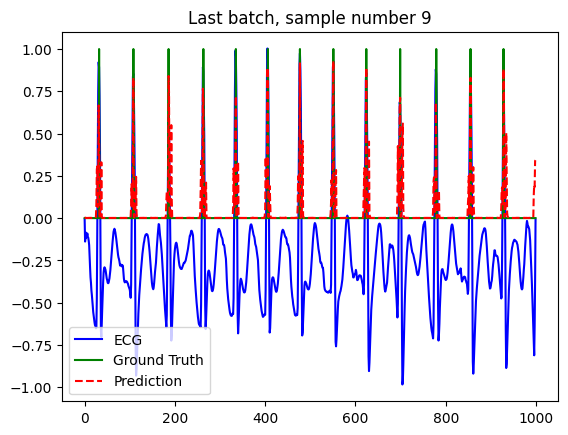

100%|██████████| 119/119 [02:10<00:00,  1.09s/it]



Train Loss: 0.0899
train Weighted Accuracy: 0.98714
train F1 Score: 0.92974
train TPR: 0.97587
train FPR: 0.00159
train TNR: 0.99841
train FNR: 0.02413



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]



Validation Loss: 0.0891
validation Weighted Accuracy: 0.98717
validation F1 Score: 0.93675
validation TPR: 0.97573
validation FPR: 0.00138
validation TNR: 0.99862
validation FNR: 0.02427

====Epoch [44/50]====


 99%|█████████▉| 118/119 [02:10<00:01,  1.10s/it]

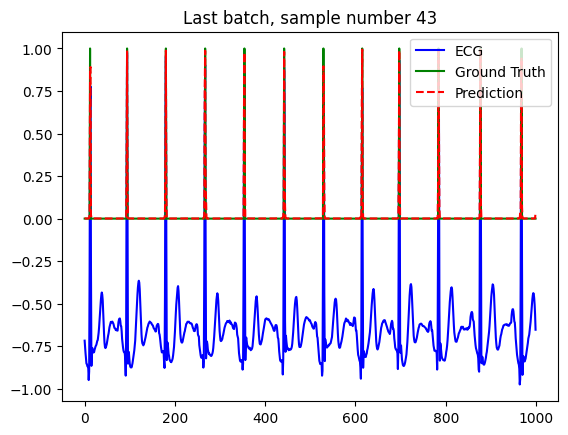

100%|██████████| 119/119 [02:11<00:00,  1.10s/it]



Train Loss: 0.0894
train Weighted Accuracy: 0.98734
train F1 Score: 0.92954
train TPR: 0.97628
train FPR: 0.00160
train TNR: 0.99840
train FNR: 0.02372



100%|██████████| 20/20 [00:04<00:00,  4.89it/s]



Validation Loss: 0.0885
validation Weighted Accuracy: 0.98744
validation F1 Score: 0.93596
validation TPR: 0.97629
validation FPR: 0.00141
validation TNR: 0.99859
validation FNR: 0.02371

====Epoch [45/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

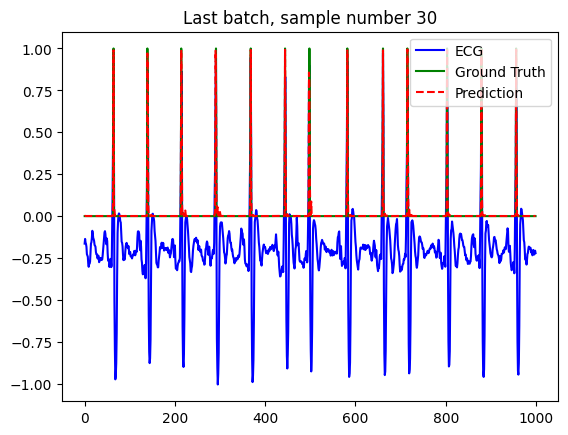

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0889
train Weighted Accuracy: 0.98751
train F1 Score: 0.92865
train TPR: 0.97664
train FPR: 0.00163
train TNR: 0.99837
train FNR: 0.02336



100%|██████████| 20/20 [00:04<00:00,  4.91it/s]



Validation Loss: 0.0881
validation Weighted Accuracy: 0.98738
validation F1 Score: 0.93578
validation TPR: 0.97617
validation FPR: 0.00141
validation TNR: 0.99859
validation FNR: 0.02383

====Epoch [46/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

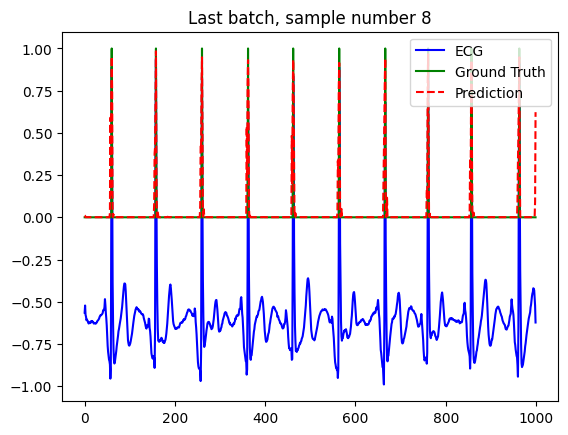

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0884
train Weighted Accuracy: 0.98752
train F1 Score: 0.92822
train TPR: 0.97667
train FPR: 0.00164
train TNR: 0.99836
train FNR: 0.02333



100%|██████████| 20/20 [00:04<00:00,  4.91it/s]



Validation Loss: 0.0875
validation Weighted Accuracy: 0.98744
validation F1 Score: 0.93475
validation TPR: 0.97633
validation FPR: 0.00145
validation TNR: 0.99855
validation FNR: 0.02367

====Epoch [47/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

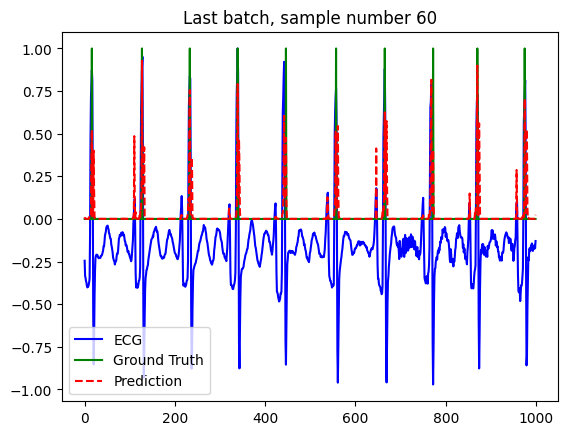

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0879
train Weighted Accuracy: 0.98775
train F1 Score: 0.92760
train TPR: 0.97717
train FPR: 0.00167
train TNR: 0.99833
train FNR: 0.02283



100%|██████████| 20/20 [00:04<00:00,  4.91it/s]



Validation Loss: 0.0870
validation Weighted Accuracy: 0.98771
validation F1 Score: 0.93422
validation TPR: 0.97689
validation FPR: 0.00147
validation TNR: 0.99853
validation FNR: 0.02311

====Epoch [48/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

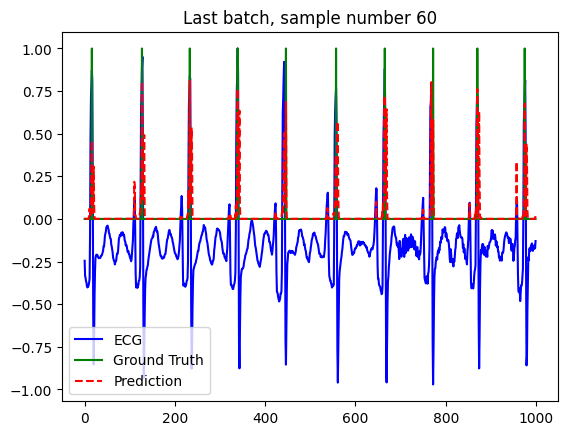

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0874
train Weighted Accuracy: 0.98790
train F1 Score: 0.92772
train TPR: 0.97747
train FPR: 0.00167
train TNR: 0.99833
train FNR: 0.02253



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]



Validation Loss: 0.0865
validation Weighted Accuracy: 0.98765
validation F1 Score: 0.93430
validation TPR: 0.97677
validation FPR: 0.00147
validation TNR: 0.99853
validation FNR: 0.02323

====Epoch [49/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

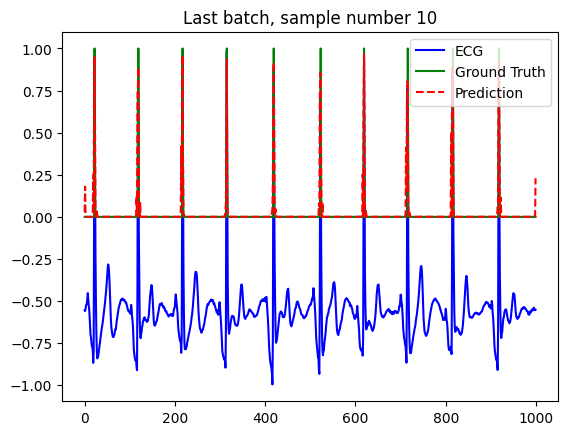

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0870
train Weighted Accuracy: 0.98795
train F1 Score: 0.92667
train TPR: 0.97760
train FPR: 0.00170
train TNR: 0.99830
train FNR: 0.02240



100%|██████████| 20/20 [00:04<00:00,  4.92it/s]



Validation Loss: 0.0860
validation Weighted Accuracy: 0.98767
validation F1 Score: 0.93411
validation TPR: 0.97681
validation FPR: 0.00147
validation TNR: 0.99853
validation FNR: 0.02319

====Epoch [50/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

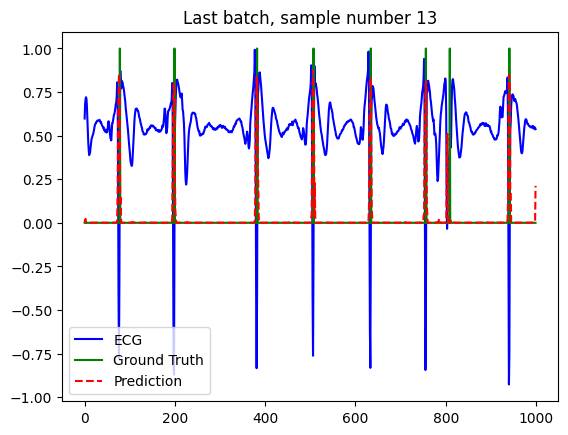

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0865
train Weighted Accuracy: 0.98802
train F1 Score: 0.92598
train TPR: 0.97777
train FPR: 0.00172
train TNR: 0.99828
train FNR: 0.02223



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]



Validation Loss: 0.0855
validation Weighted Accuracy: 0.98760
validation F1 Score: 0.93324
validation TPR: 0.97669
validation FPR: 0.00149
validation TNR: 0.99851
validation FNR: 0.02331



In [9]:
model.train_model(x_train=x_train, y_train=y_train, epochs=epochs, batch_size=batch_size, x_val=x_val, y_val=y_val)

In [10]:
import pickle
with open("./metrics/TNET.pkl", "wb") as f:
  pickle.dump(model.get_metrics(), f)

In [11]:
with open("./metrics/TNET.pkl", "rb") as f:
  metrics = pickle.load(f)

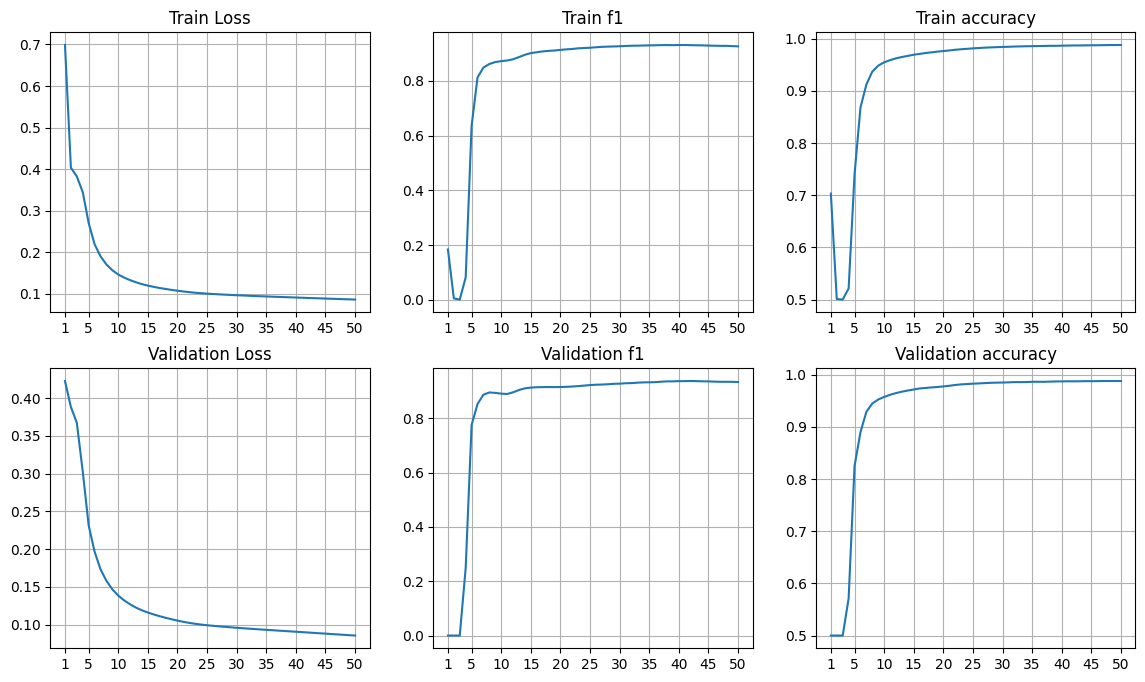

In [12]:
plot_metrics(metrics)

In [8]:
model.test_model(x_test, y_test)

100%|██████████| 396/396 [00:08<00:00, 48.77it/s]



Test Loss: 0.0568
test Weighted Accuracy: 0.99344
test F1 Score: 0.93739
test TPR: 0.98842
test FPR: 0.00155
test TNR: 0.99845
test FNR: 0.01158



## Testing with Apnea-ecg

In [5]:
x , y = load_physionet_ecgs(path=apnea_ecg_path, annotation_file_extension="qrs", window_in_seconds=10, force_new=False, expand=False, denoise=True)

In [7]:
x_test = np.expand_dims(x, axis=2)
y_test = np.expand_dims(y, axis=2)

  0%|          | 0/20330 [00:00<?, ?it/s]e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


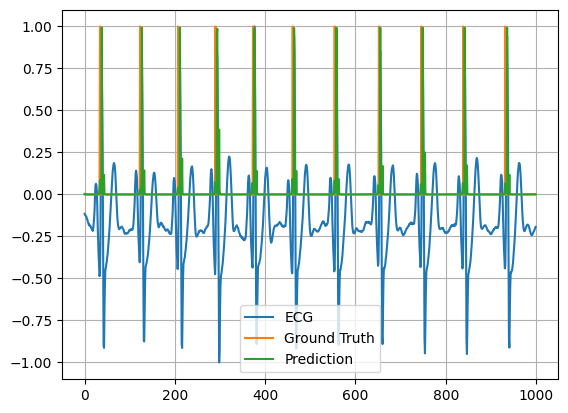

 10%|▉         | 2029/20330 [00:41<05:58, 51.07it/s]

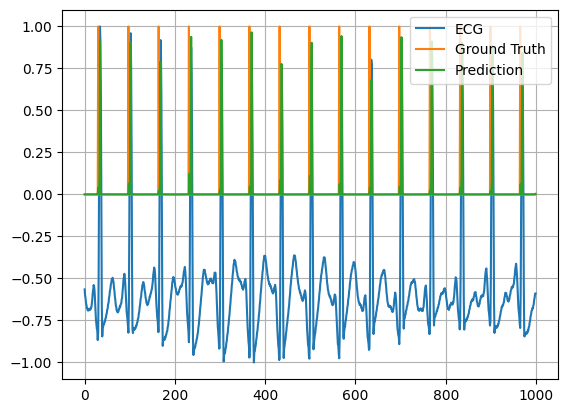

 20%|█▉        | 4063/20330 [01:22<05:22, 50.50it/s]

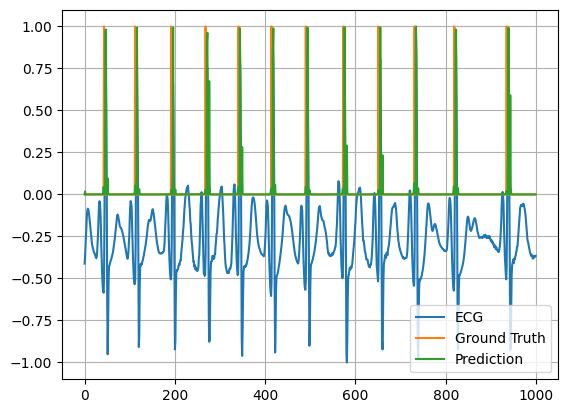

 30%|███       | 6099/20330 [02:03<06:18, 37.64it/s]

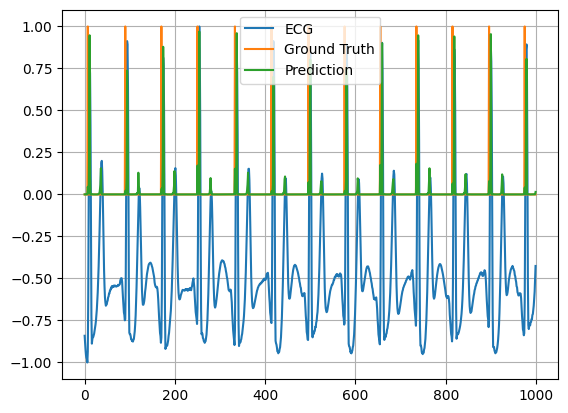

 40%|███▉      | 8130/20330 [02:44<03:57, 51.32it/s]

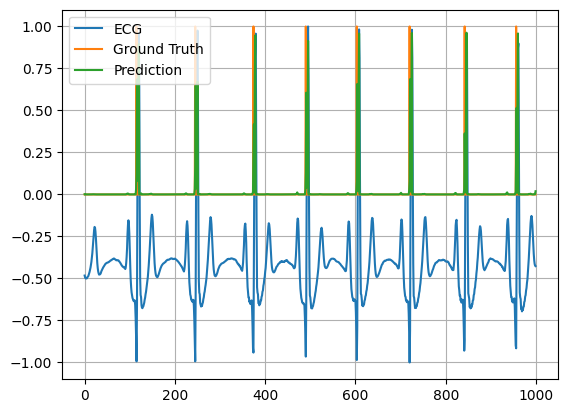

 50%|████▉     | 10164/20330 [03:25<03:21, 50.50it/s]

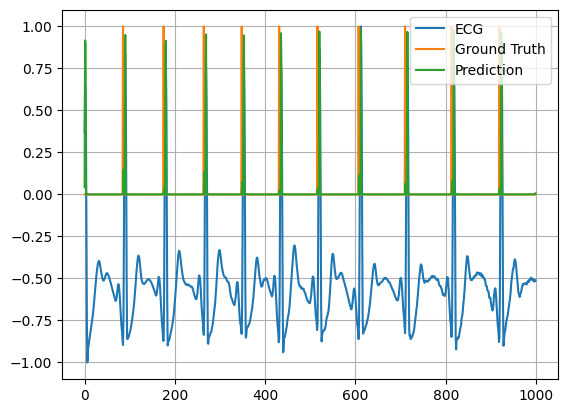

 60%|█████▉    | 12194/20330 [04:05<02:38, 51.43it/s]

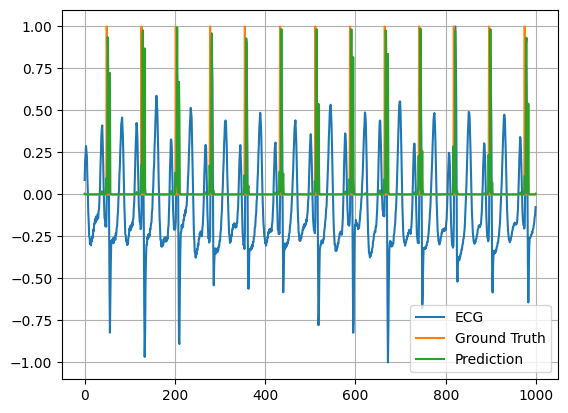

 70%|██████▉   | 14227/20330 [04:46<01:58, 51.35it/s]

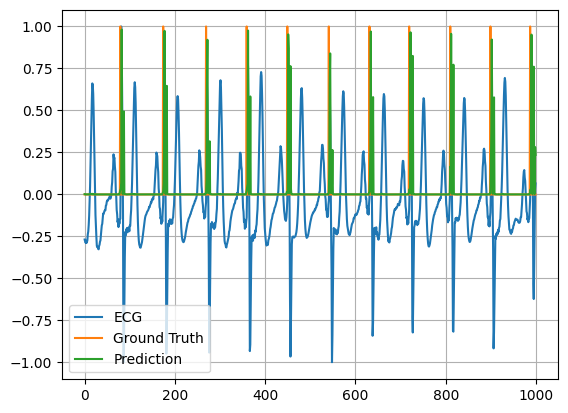

 80%|███████▉  | 16262/20330 [05:27<01:19, 50.92it/s]

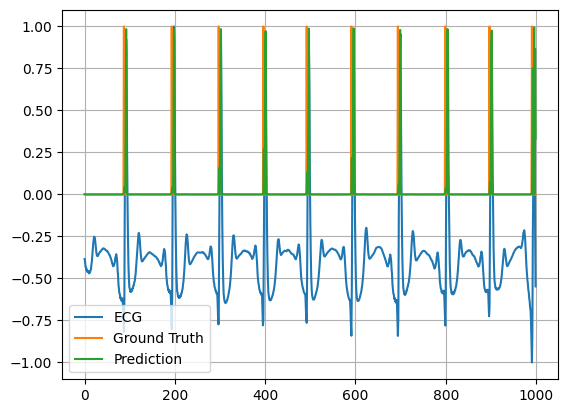

 90%|█████████ | 18297/20330 [06:08<00:40, 50.23it/s]

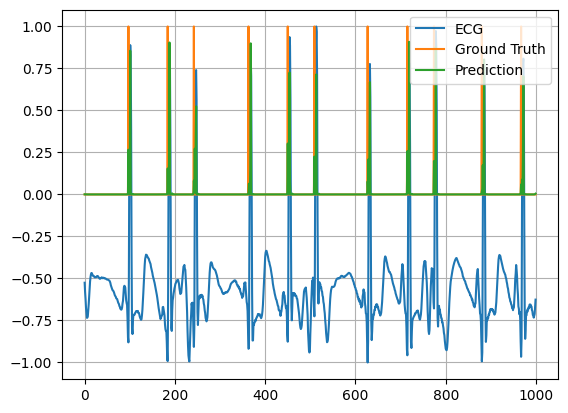

100%|██████████| 20330/20330 [06:47<00:00, 49.91it/s]



Test Loss: 0.4680
test Weighted Accuracy: 0.98478
test F1 Score: 0.81804
test TPR: 0.97411
test FPR: 0.00454
test TNR: 0.99546
test FNR: 0.02589



In [11]:
model.test_model(x_test, y_test, plot=True)

### Test with own ECG

In [22]:
import matplotlib.pyplot as plt
from customLib.preprocess import split_signal

In [6]:
my_ecg = np.load("E:\\ml-data\\masters-thesis\\myDataset\\Patryk\\07-05-24_16_56.npy")

In [17]:
ecgs = split_signal(signal=my_ecg, window_in_seconds=10, fs=250, normalize=True, denoise=True)
ecgs = np.array(ecgs)
# ecgs = np.expand_dims(ecgs, 2)
print("Shpae: ", ecgs.shape)

Shpae:  (66, 2500)


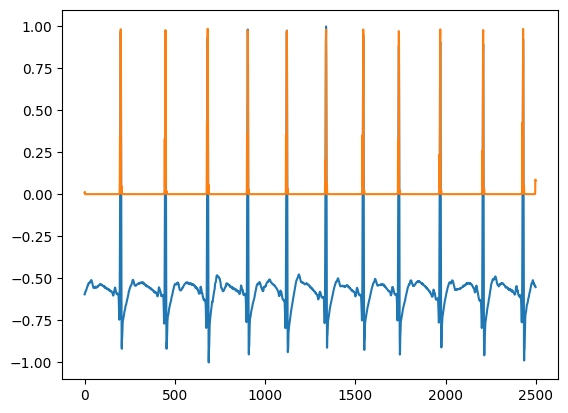

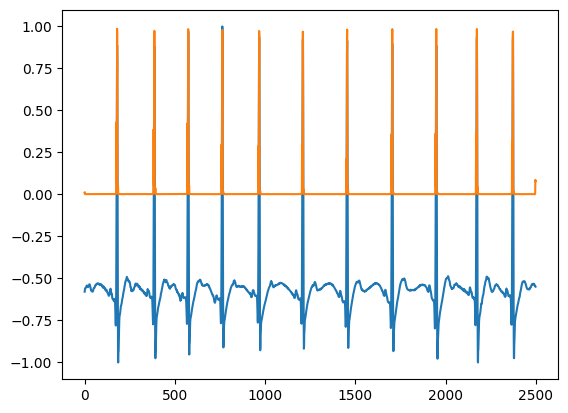

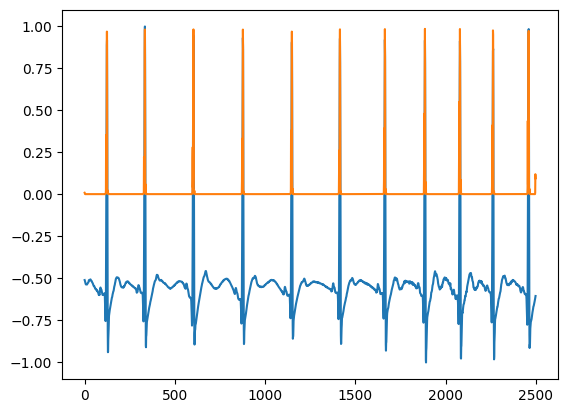

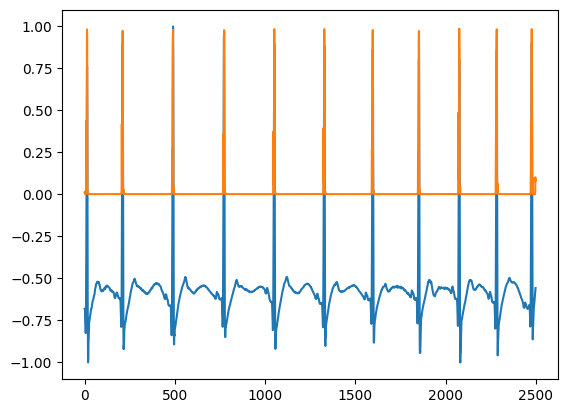

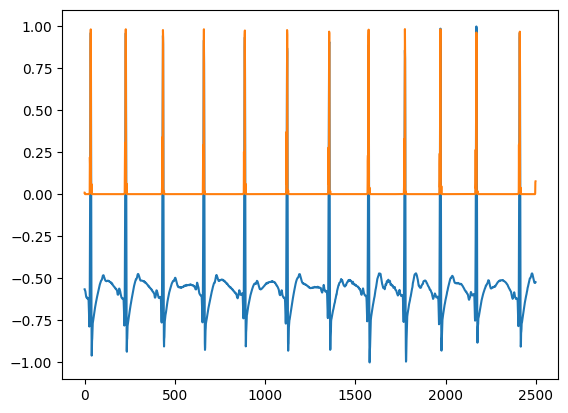

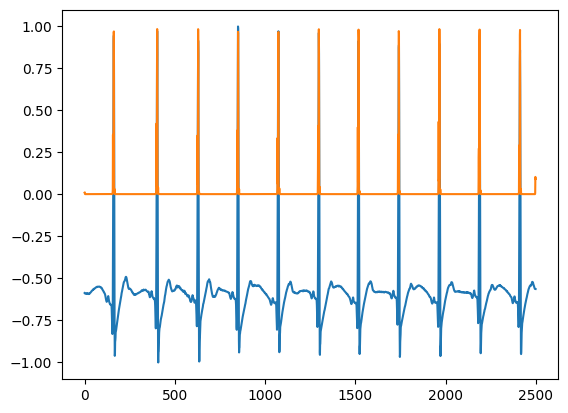

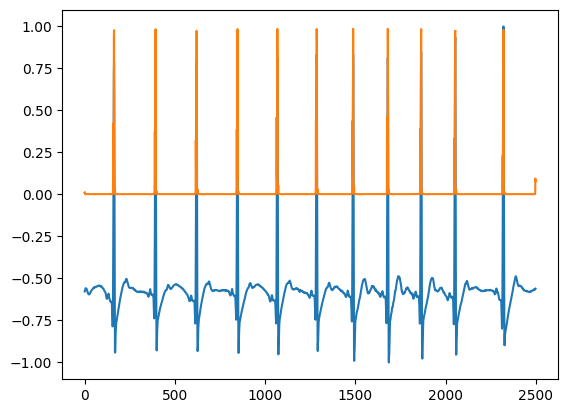

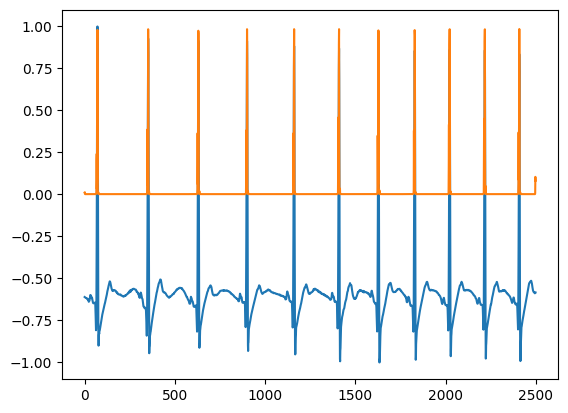

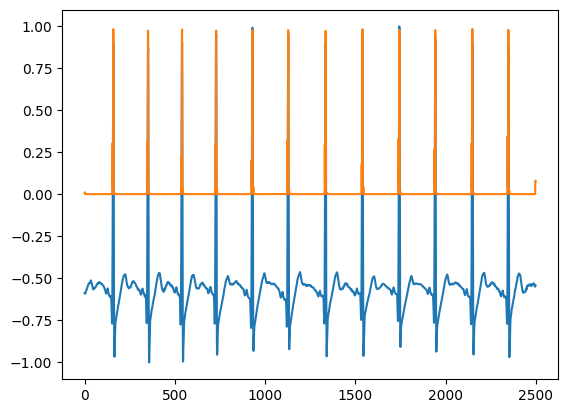

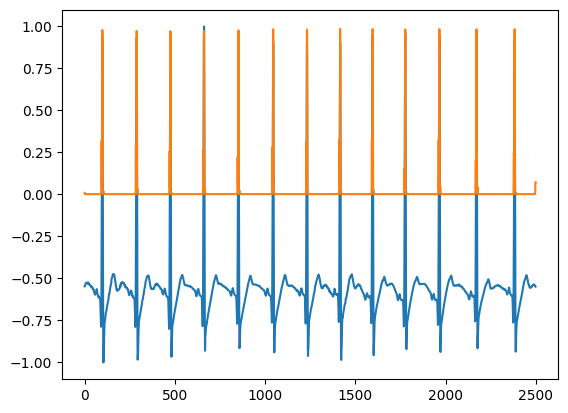

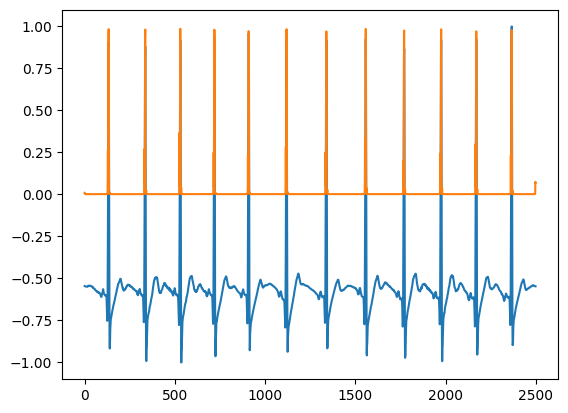

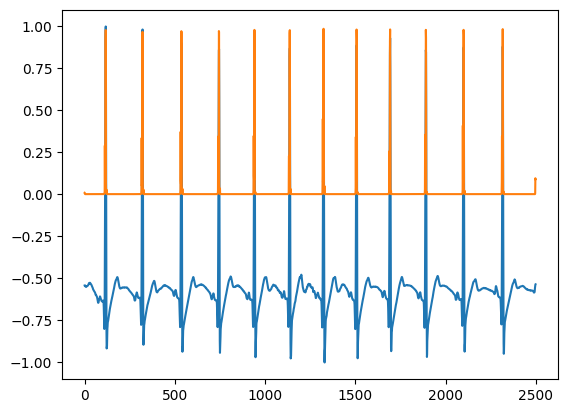

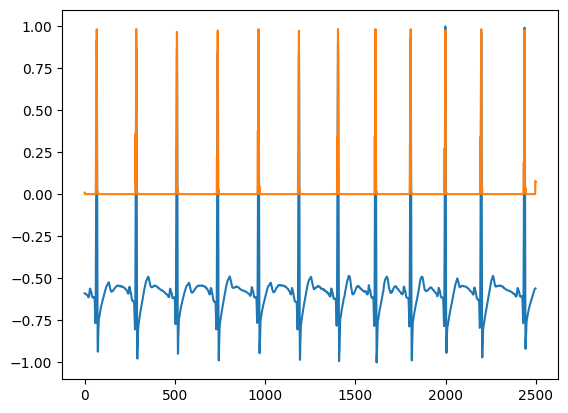

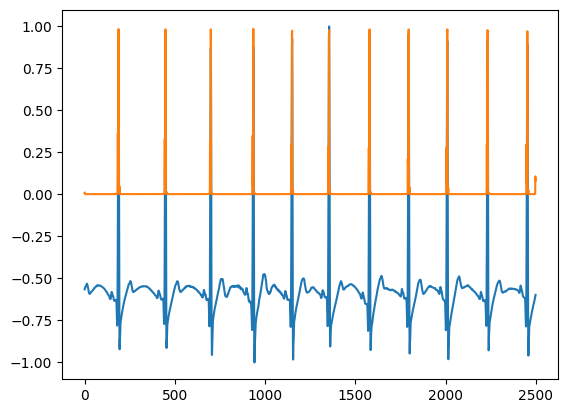

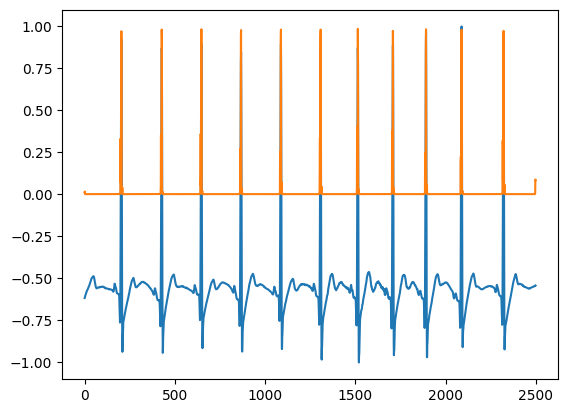

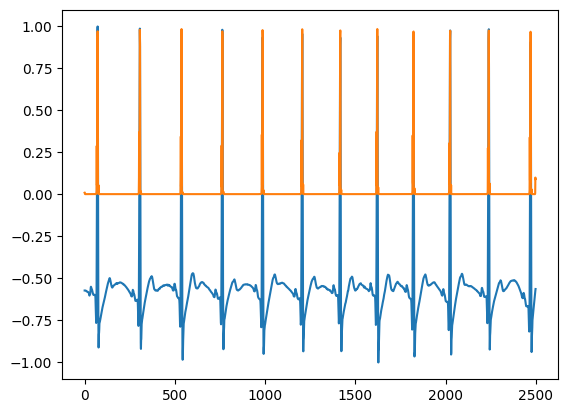

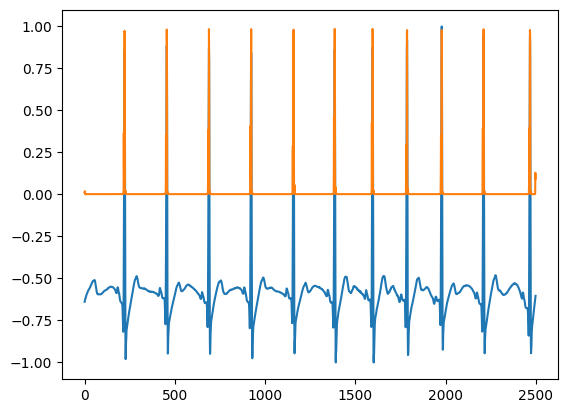

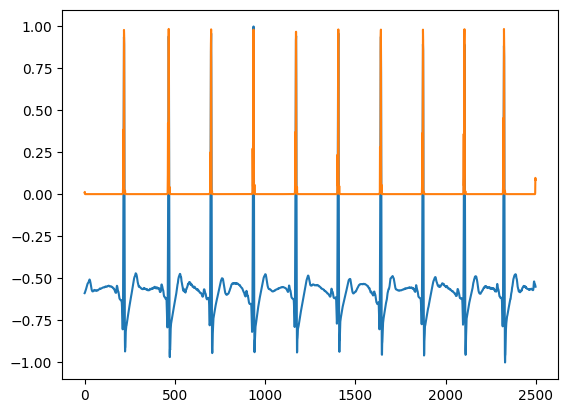

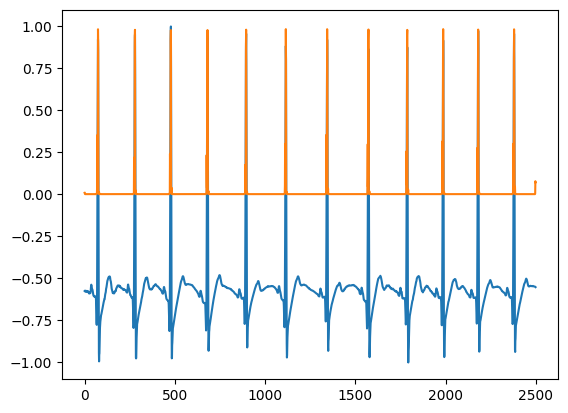

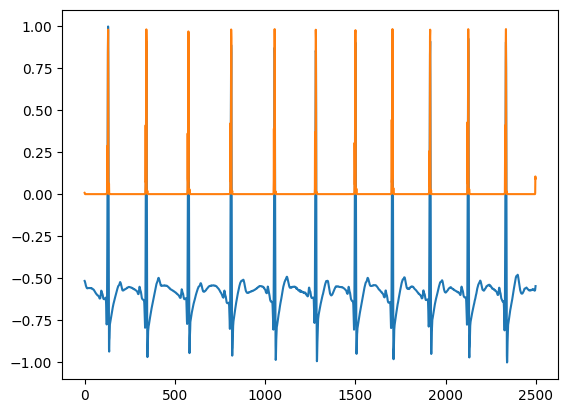

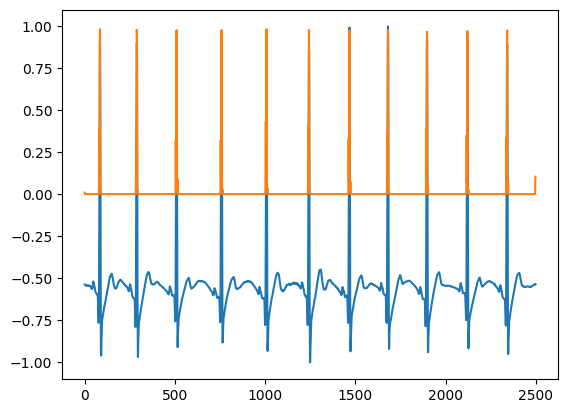

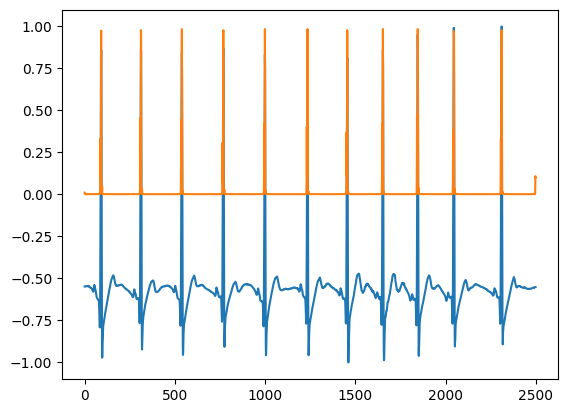

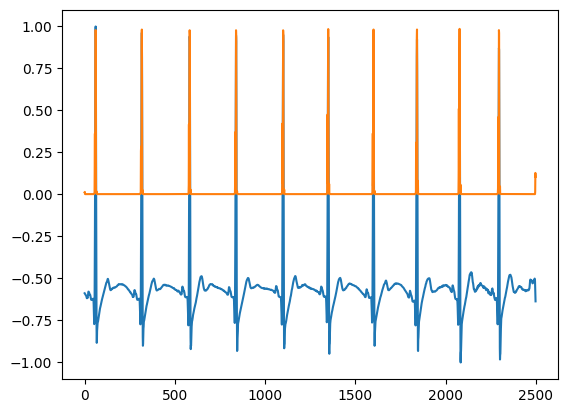

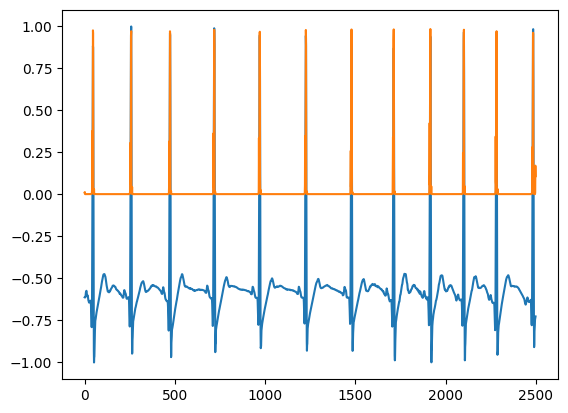

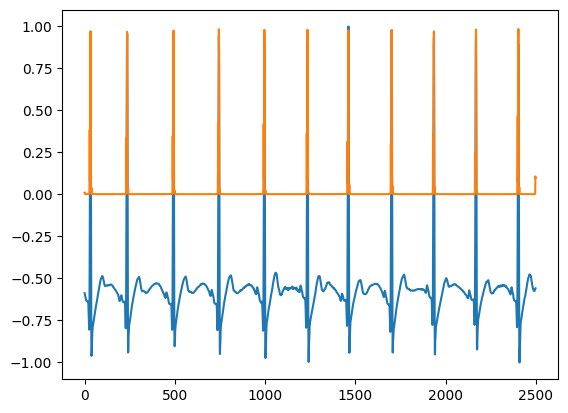

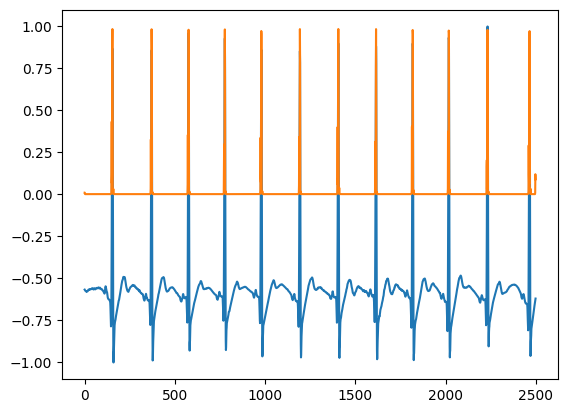

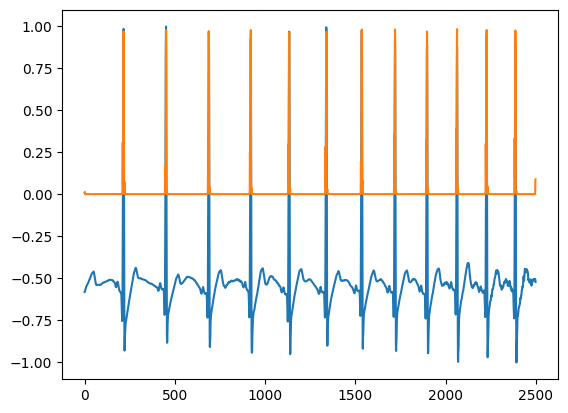

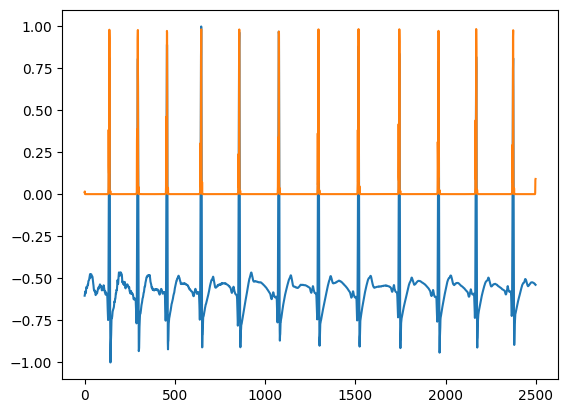

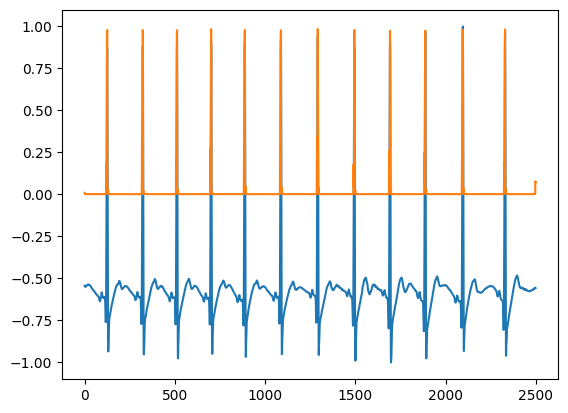

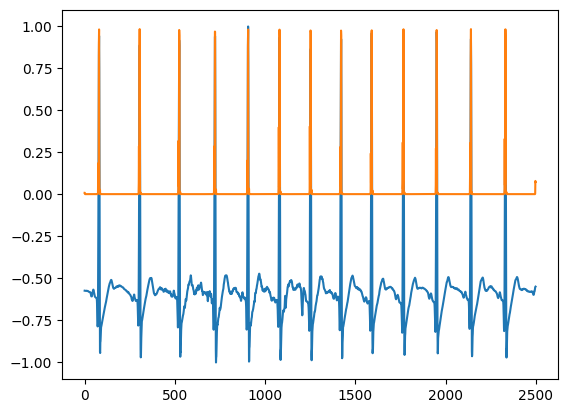

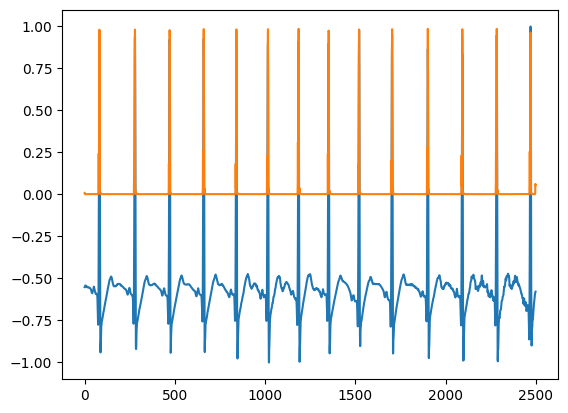

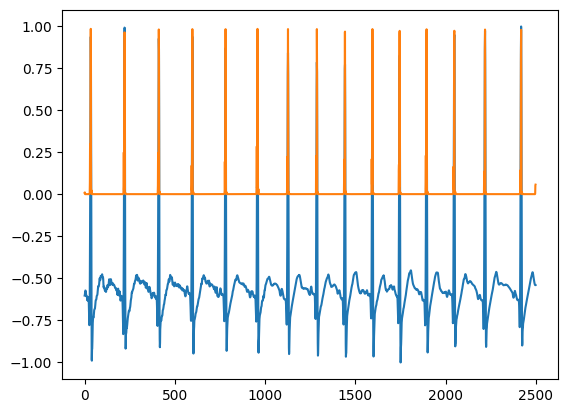

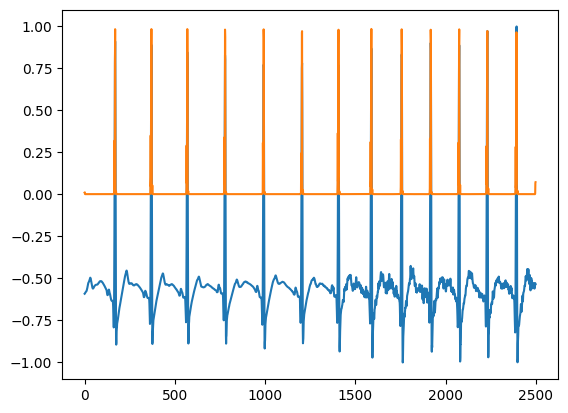

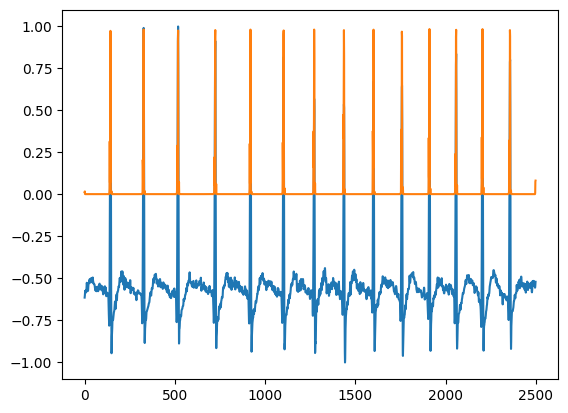

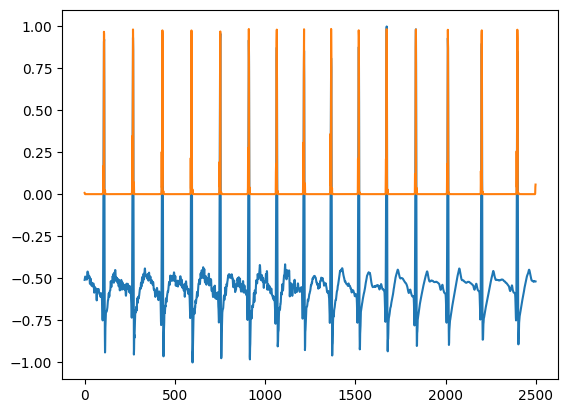

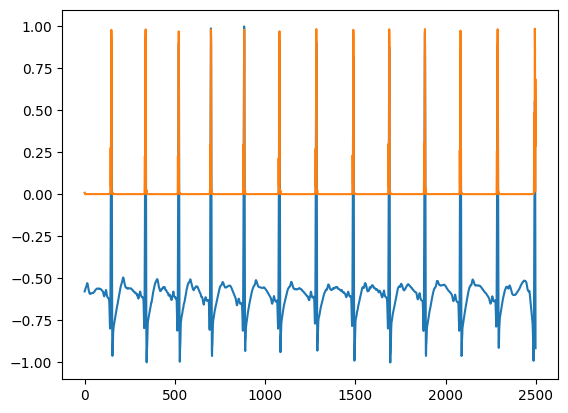

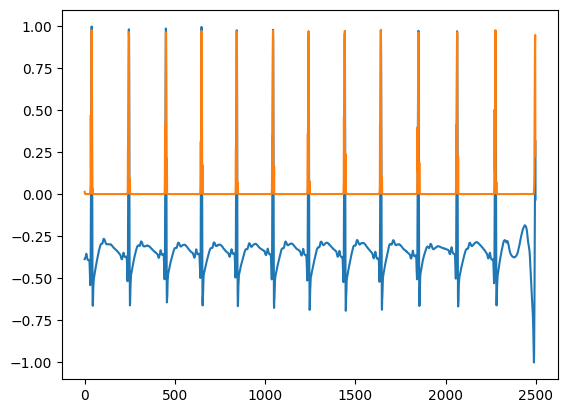

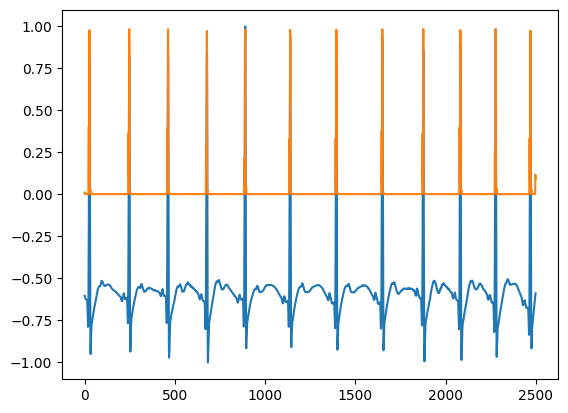

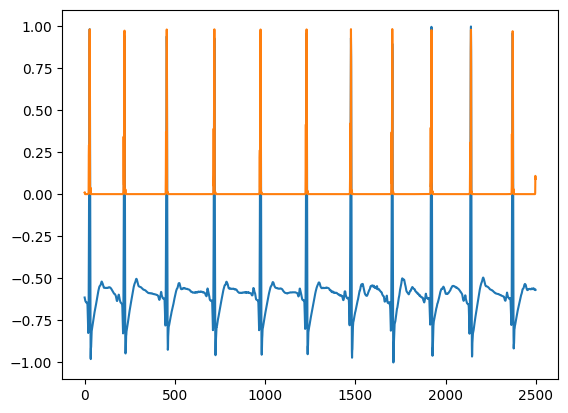

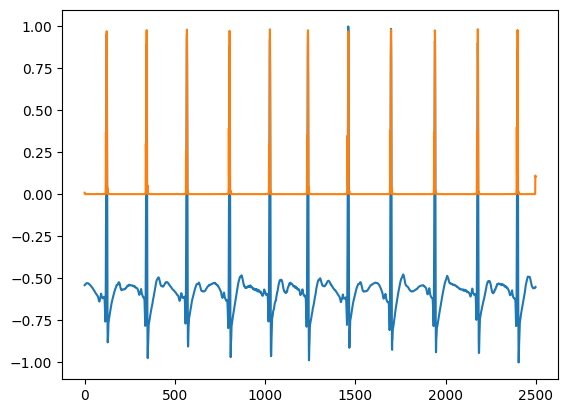

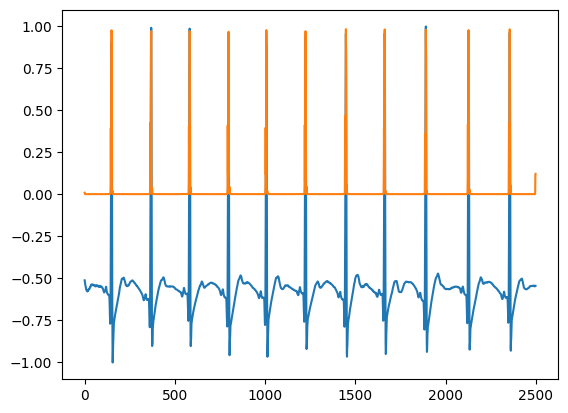

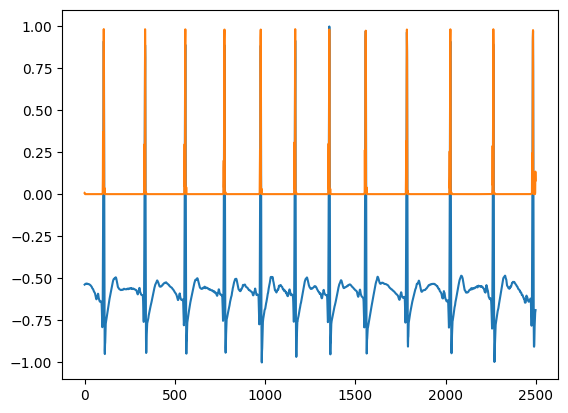

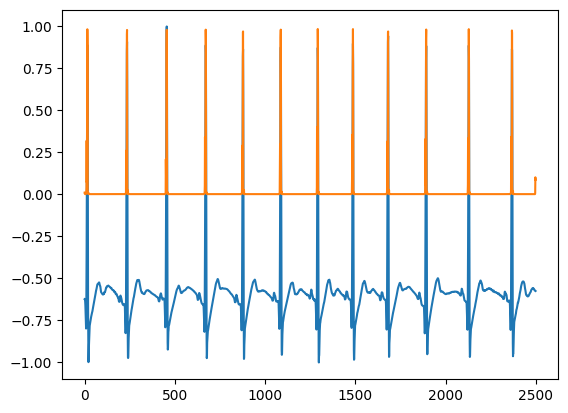

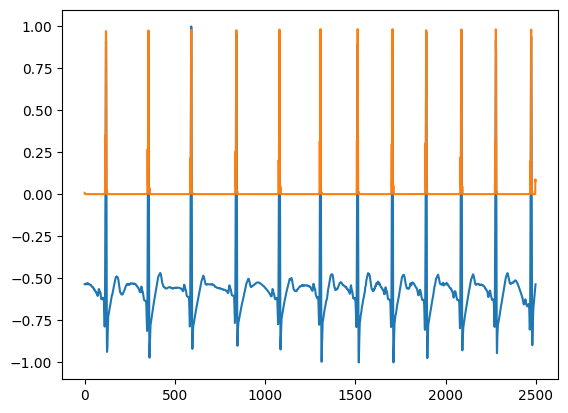

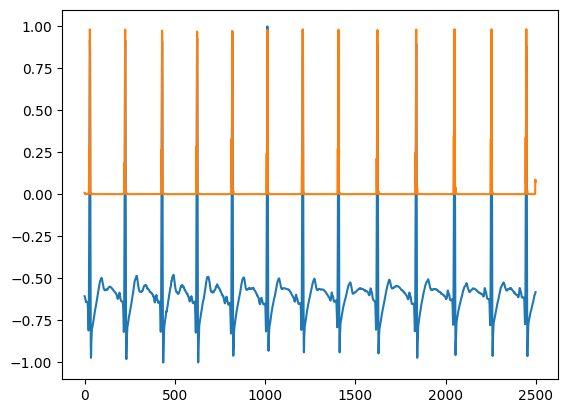

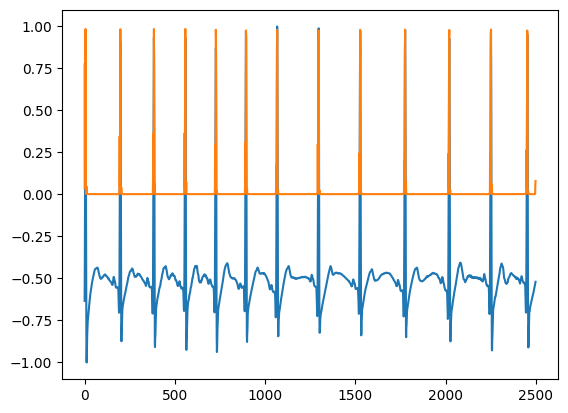

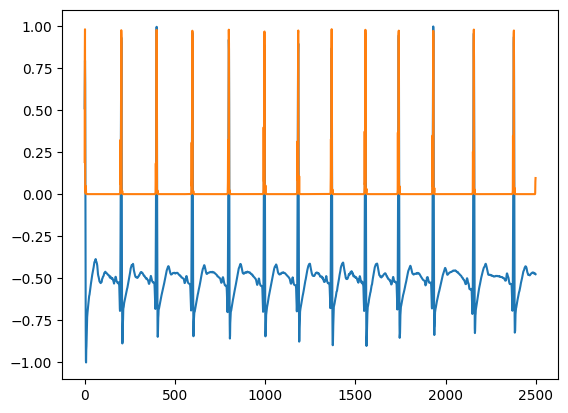

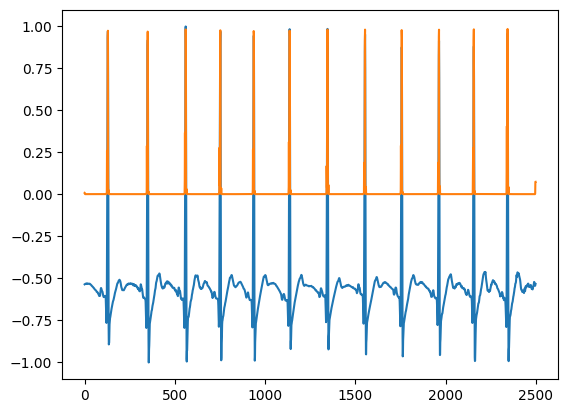

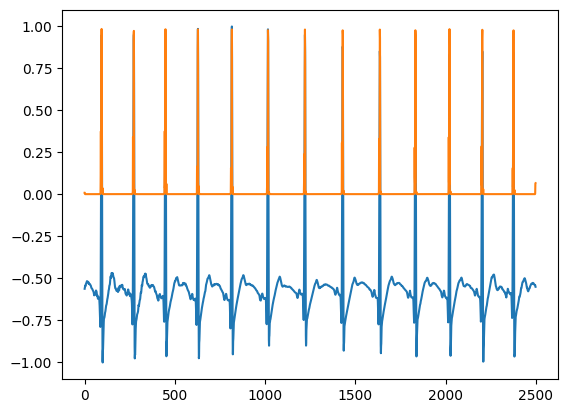

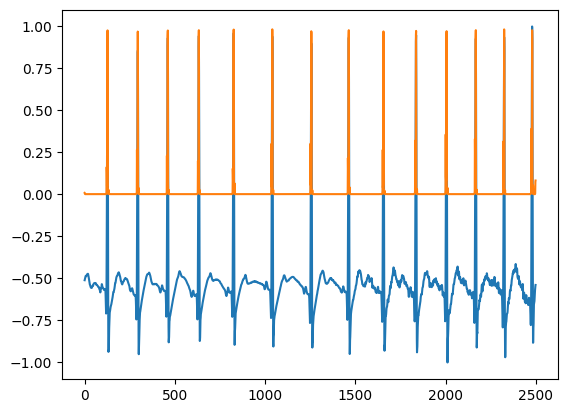

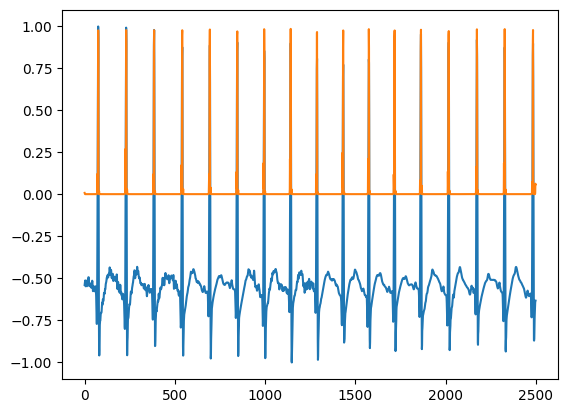

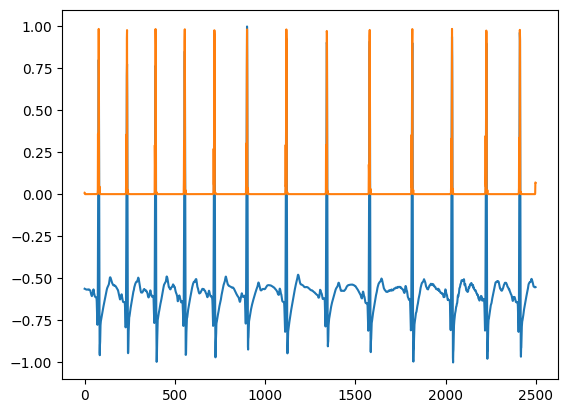

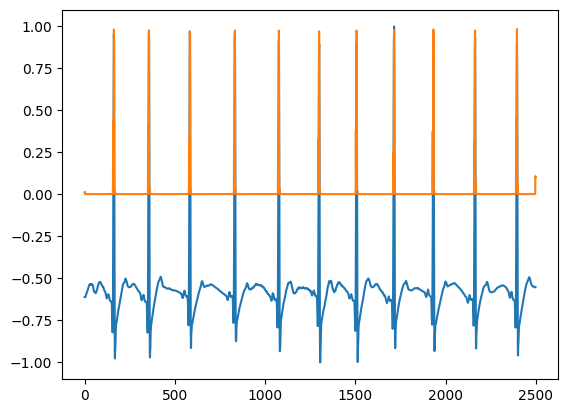

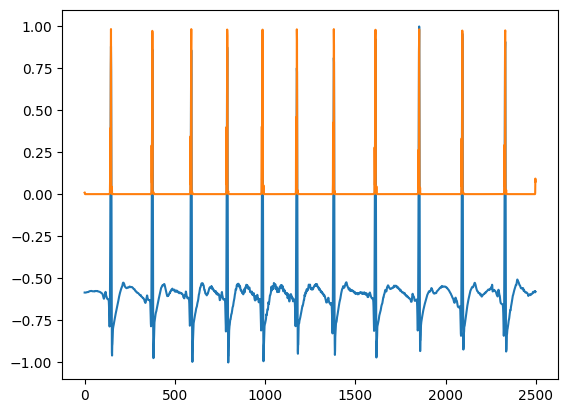

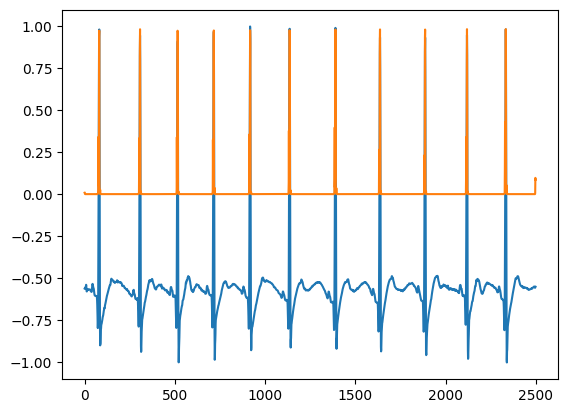

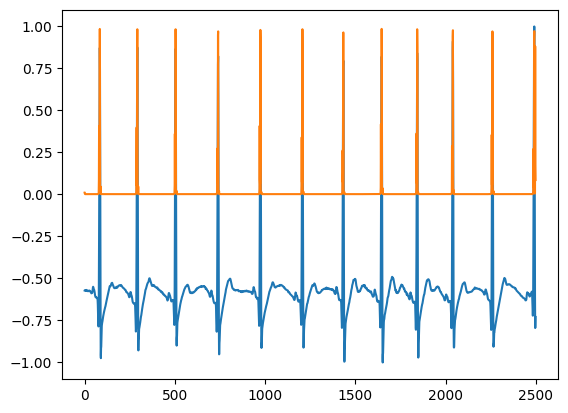

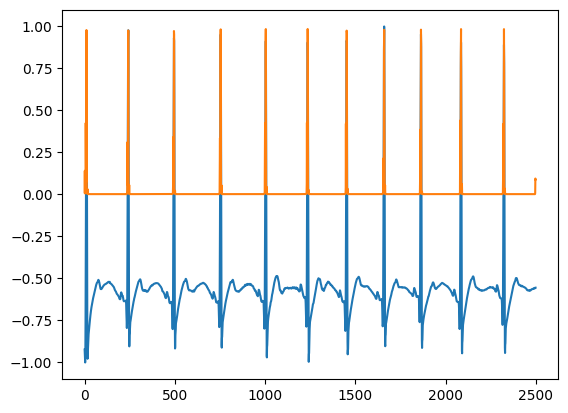

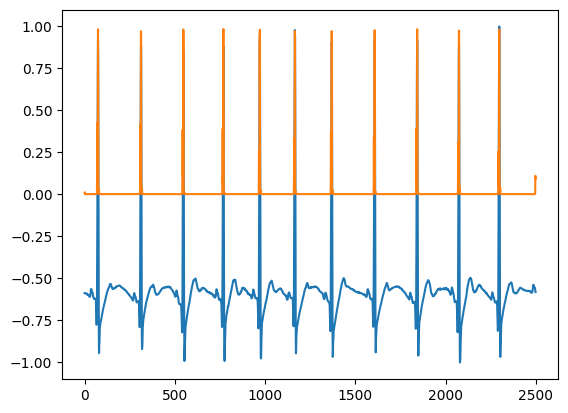

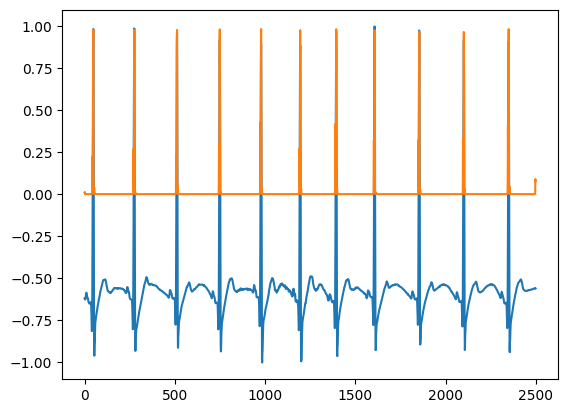

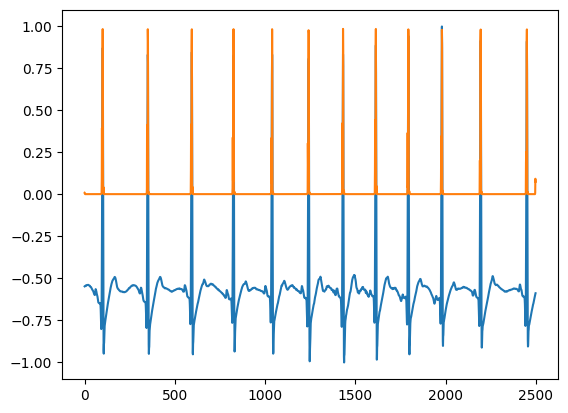

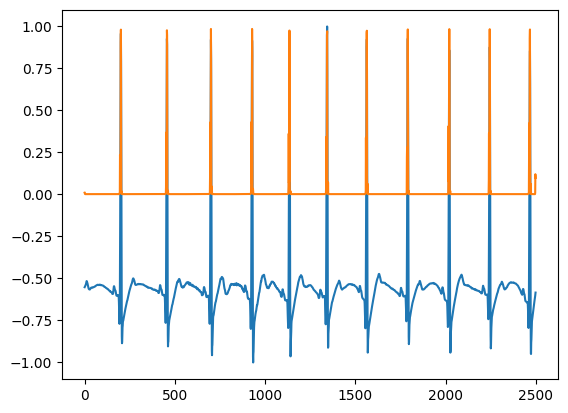

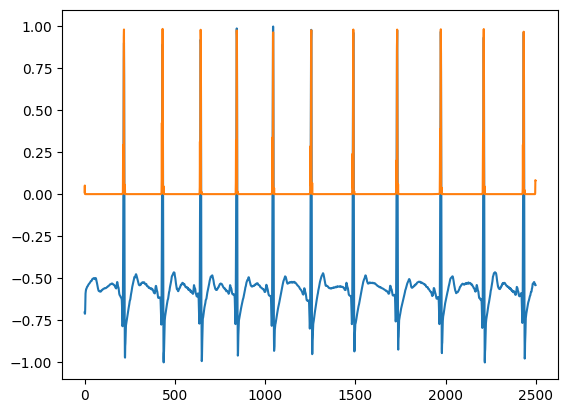

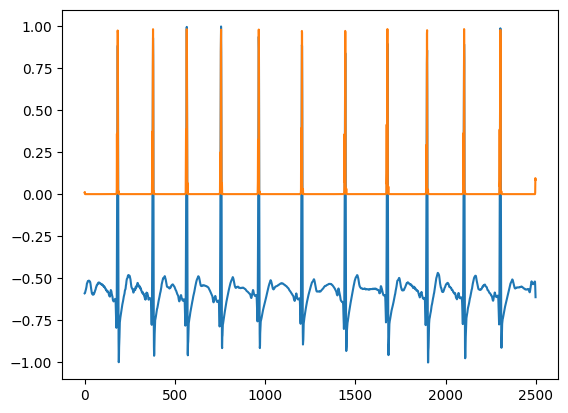

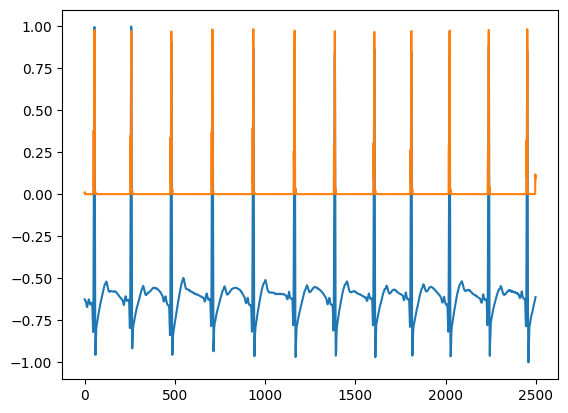

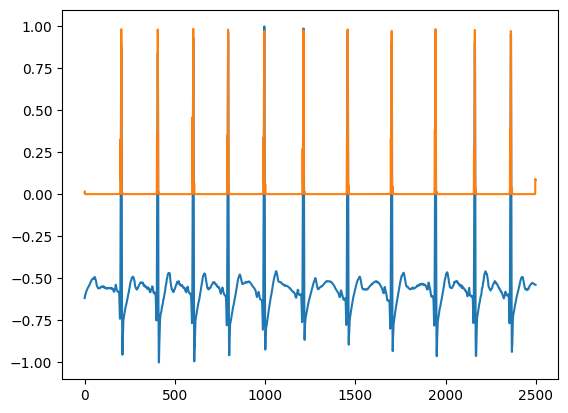

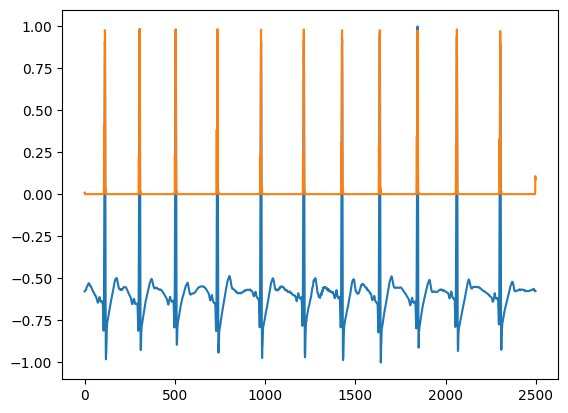

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for i in range(ecgs.shape[0]):
  ecg = np.reshape(ecgs[i], (1,-1,1))
  ecg_gpu = torch.Tensor(ecg).to(device)
  prediction = model(ecg_gpu)
  prediction = prediction.cpu().detach().numpy().flatten()
  
  plt.plot(ecg.flatten())
  plt.plot(prediction.flatten())
  plt.show()

### Test with Apnea-ecg dataset

In [7]:
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(apnea_ecg_path + "\\dataset", is_validation_set=True)

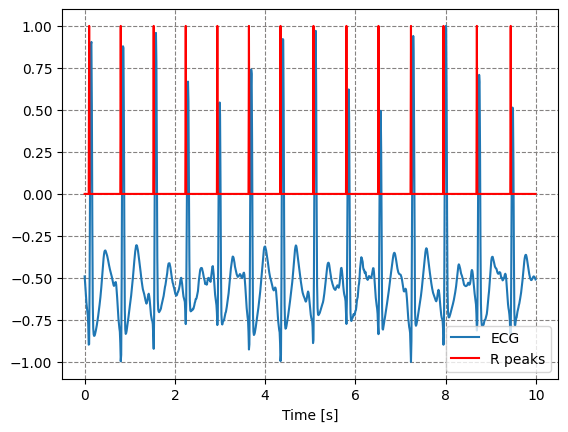

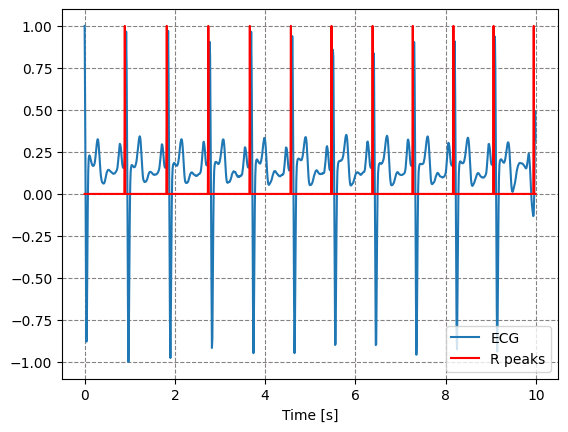

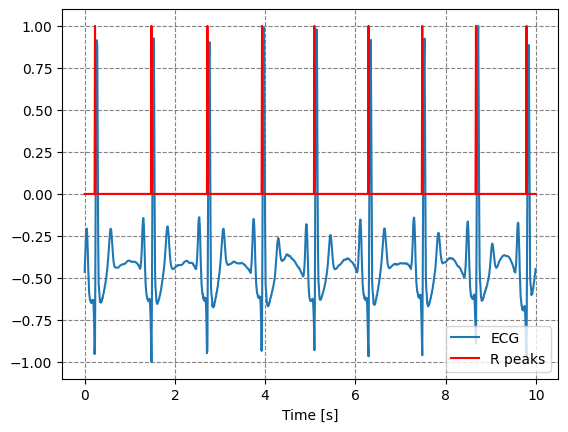

In [8]:
x_train = np.expand_dims(x_train, 2)
y_train = np.expand_dims(y_train, 2)

x_test = np.expand_dims(x_test, 2)
y_test = np.expand_dims(y_test, 2)

x_val = np.expand_dims(x_val, 2)
y_val = np.expand_dims(y_val, 2)

plot_ecg(x_train[100].flatten(), y_train[100].flatten(), 100)
plot_ecg(x_test[-1].flatten(), y_test[-1].flatten(), 100)
plot_ecg(x_val[-1].flatten(), y_val[-1].flatten(), 100)

  0%|          | 0/16264 [00:00<?, ?it/s]e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


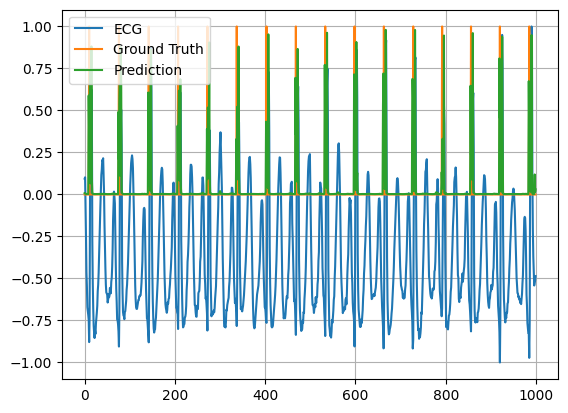

 10%|▉         | 1621/16264 [00:33<04:50, 50.36it/s]

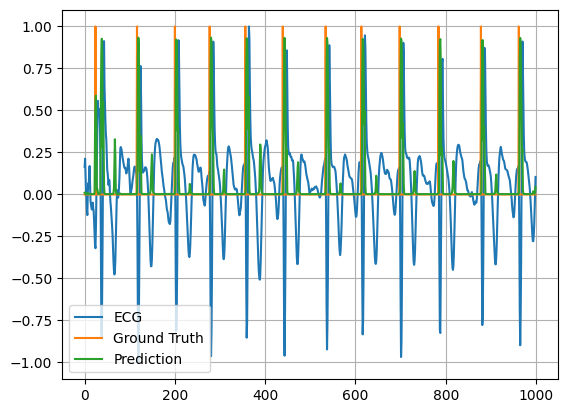

 20%|█▉        | 3248/16264 [01:06<04:18, 50.34it/s]

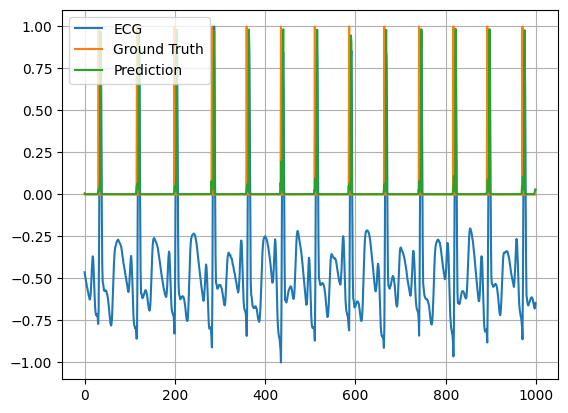

 30%|██▉       | 4873/16264 [01:39<03:48, 49.88it/s]

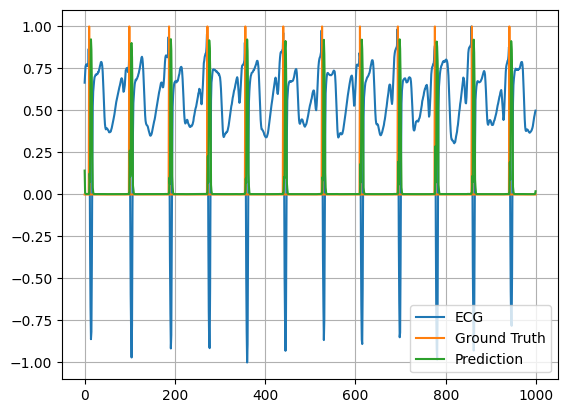

 40%|███▉      | 6504/16264 [02:12<03:15, 49.96it/s]

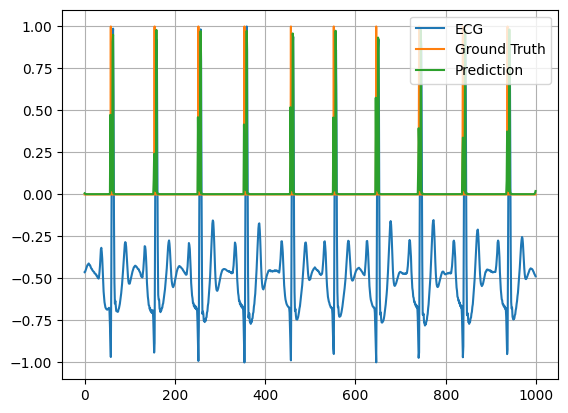

 50%|████▉     | 8128/16264 [02:45<02:42, 50.14it/s]

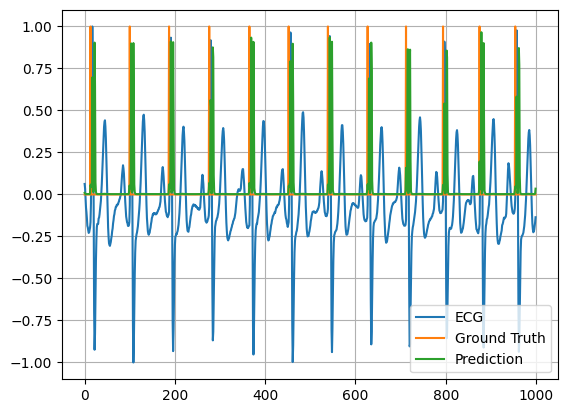

 60%|█████▉    | 9752/16264 [03:19<02:15, 47.98it/s]

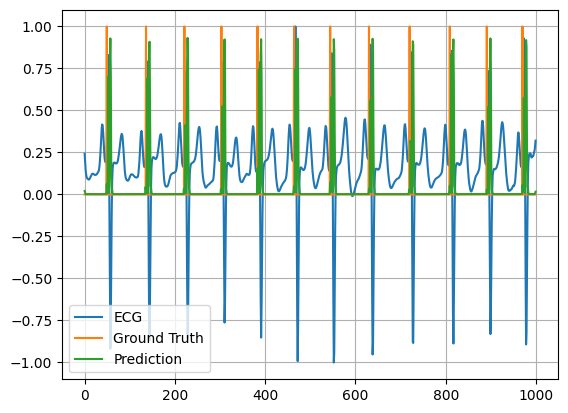

 70%|██████▉   | 11377/16264 [03:53<01:38, 49.82it/s]

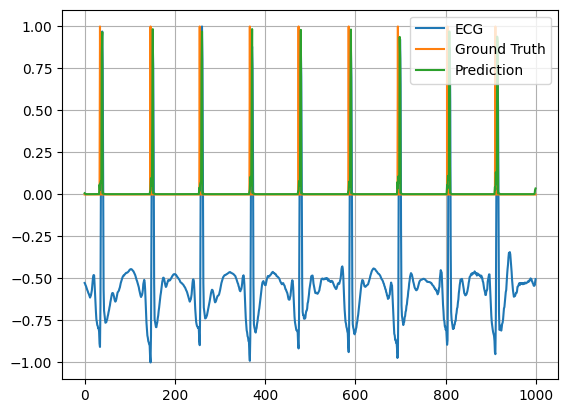

 80%|███████▉  | 13003/16264 [04:28<01:04, 50.18it/s]

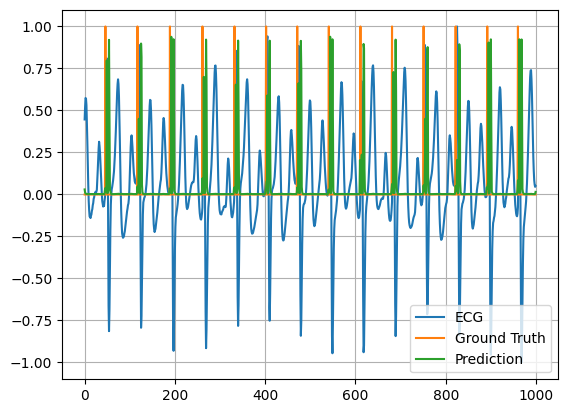

 90%|████████▉ | 14630/16264 [05:01<00:32, 49.95it/s]

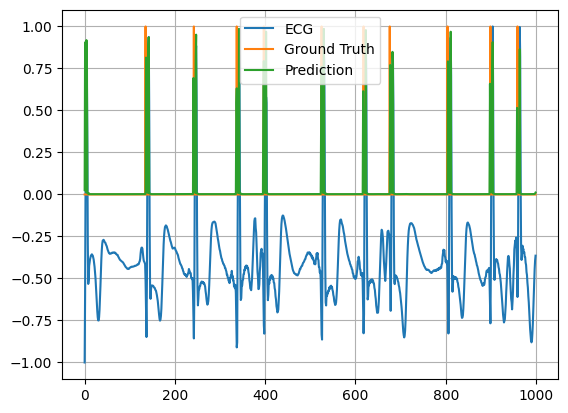

100%|█████████▉| 16260/16264 [05:42<00:00, 50.35it/s]

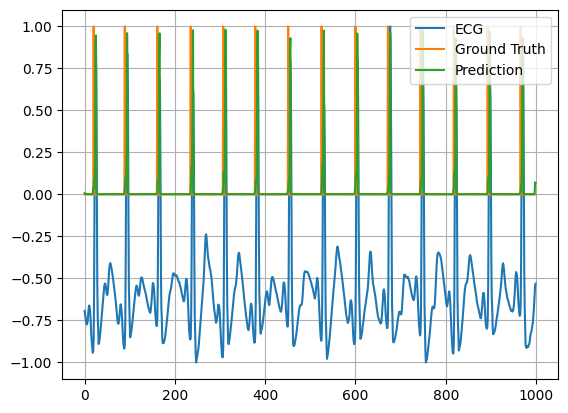

100%|██████████| 16264/16264 [05:43<00:00, 47.39it/s]



Test Loss: 0.3573
Test Weighted Accuracy: 0.98420
Test F1 Score: 0.75749
Test TPR: 0.97508
Test FPR: 0.00668
Test TNR: 0.99332
Test FNR: 0.02492



In [9]:
model.test_model(x_test=x_train,y_test=y_train, plot=True)